In [1]:
# Load new data
test <- read.csv("C:/Users/Apurva Sista/Desktop/RLearn/test.csv", header = TRUE)
train <- read.csv("C:/Users/Apurva Sista/Desktop/RLearn/train.csv", header = TRUE)

In [2]:
# Add a "survived" variable to the test set to allow for combining data sets
test.survived <- data.frame(Survived = rep("none", nrow(test)),test[,])

In [3]:
# Combine the data sets
data.combined <- rbind(train, test.survived)

In [4]:
head(data.combined)

Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
1,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
0,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
0,6,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [5]:
# A bit about R data types (eg. factors,....etc.)
str(data.combined)

'data.frame':	1309 obs. of  12 variables:
 $ Survived   : chr  "0" "1" "1" "1" ...
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 1307 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 929 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 187 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [6]:
data.combined$Survived <- as.factor(data.combined$Survived)
data.combined$Pclass <- as.factor(data.combined$Pclass)
data.combined$PassengerId <- as.factor(data.combined$PassengerId)

In [7]:
# Take a look at the gross survival rates
table(data.combined$Survived)


   0    1 none 
 549  342  418 

In [8]:
# Let's look at the Pclass variable in terms of Survival
table(data.combined$Pclass,data.combined$Survived)

   
      0   1 none
  1  80 136  107
  2  97  87   93
  3 372 119  218

'data.frame':	891 obs. of  12 variables:
 $ Survived   : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


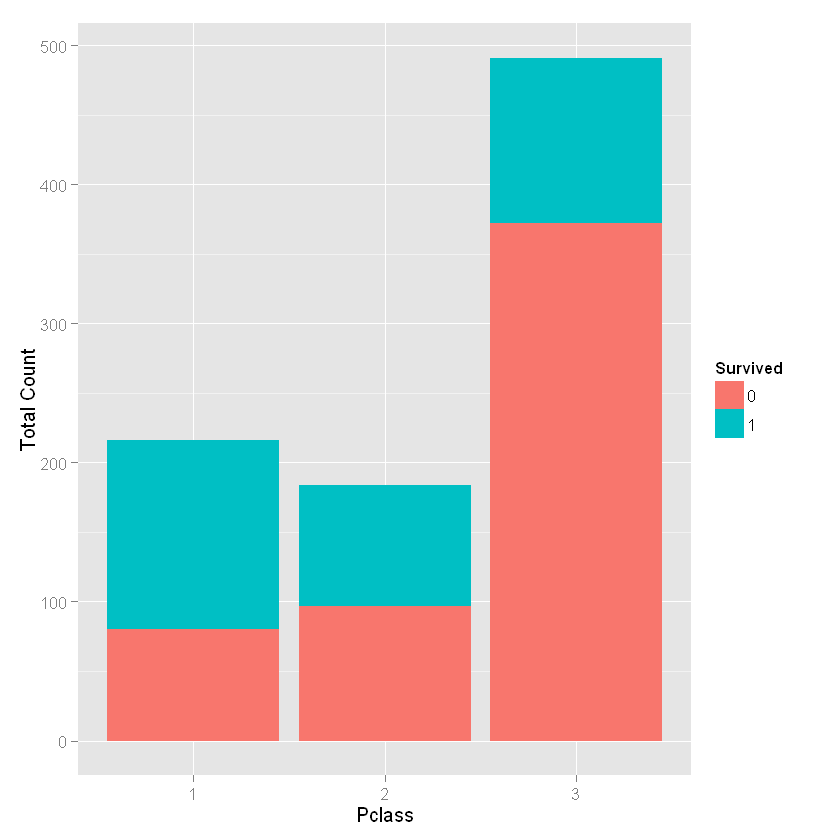

In [9]:
# Load ggplot2 package for visualization
library(ggplot2)

# Hypothesis is that the rich folks "survived"!
train$Pclass <- as.factor(train$Pclass)
train$Survived <- as.factor(train$Survived)
str(train)
ggplot(train, aes(x = Pclass, fill = Survived)) +
  geom_bar() +
  xlab("Pclass") +
  ylab("Total Count")

In [10]:
# Examining the First names in the training dataset
head(as.character(train$Name))

[1] "Braund, Mr. Owen Harris"                            
[2] "Cumings, Mrs. John Bradley (Florence Briggs Thayer)"
[3] "Heikkinen, Miss. Laina"                             
[4] "Futrelle, Mrs. Jacques Heath (Lily May Peel)"       
[5] "Allen, Mr. William Henry"                           
[6] "Moran, Mr. James"

In [11]:
# How many unique names are there in the Test and Train datasets
length(unique(as.character(data.combined$Name)))

[1] 1307

In [12]:
# There seem to be 2 duplicate names. Let's check
# Let's get the duplicate names and store them as a vector
dup.names <- as.character(data.combined[which(duplicated(as.character(data.combined$Name))),"Name"])

# Let's now take a look at the duplicated names in the data.combined dataset
data.combined[which(data.combined$Name %in% dup.names),]

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
290,1,290,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,,Q
697,0,697,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,,S
892,none,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
898,none,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,,Q


In [13]:
# Let's now check what is up with the 'Miss.', 'Mr.' and 'Mrs.' titles to check whether there's any co-relation there
library(stringr)

# Any correlation with other variables? Like SibSp...etc.???
misses <- data.combined[which(str_detect(data.combined$Name,"Miss.")),]
misses[1:5,]

# Let's take a look at people with "Mrs." in their names or the one's who were probably married
mrses <- data.combined[which(str_detect(data.combined$Name,"Mrs.")),]
mrses[1:5,] # All of those 5 married women survived! Which is good to know!

# Now let's take a look at men on the boat in the combined data
males <- data.combined[which(data.combined$Sex == "male"),]
males[1:5,]

# As we saw that males also have "Master" and "Mr.", let's separate them out
misters <- data.combined[which(str_detect(data.combined$Name,"Mr.")),]
misters[1:5,]

# And the same for "Masters"
masters <- data.combined[which(str_detect(data.combined$Name,"Master.")),]
masters[1:5,]

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,1,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
11,1,11,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S
12,1,12,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S
15,0,15,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,,S
23,1,23,3,"McGowan, Miss. Anna ""Annie""",female,15,0,0,330923,8.0292,,Q


,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
4,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
9,1,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,1,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
16,1,16,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16.0000,,S


,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,6,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,7,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,8,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S


,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
4,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,6,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
8,0,8,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
17,0,17,3,"Rice, Master. Eugene",male,2,4,1,382652,29.1250,,Q
51,0,51,3,"Panula, Master. Juha Niilo",male,7,4,1,3101295,39.6875,,S
60,0,60,3,"Goodwin, Master. William Frederick",male,11,5,2,CA 2144,46.9000,,S
64,0,64,3,"Skoog, Master. Harald",male,4,3,2,347088,27.9000,,S


In [14]:
# Now let's expand upon the relationship between 'Survived' and 'Pclass' by adding a new variable 'Title'
# Create a utility function to help with this extraction

extractTitle <- function(Name){
  Name <- as.character(Name)
  
  if (length(grep("Miss.",Name))>0){
    return ("Miss.")
  } else if (length(grep("Mrs.",Name))>0){
    return ("Mrs.")
  } else if (length(grep("Mr.",Name))>0){
    return ("Mr.")
  } else if (length(grep("Master.",Name))>0){
    return ("Master.")
  } else {
    return("Other")
  }
}

titles <- NULL
for (i in 1:nrow(data.combined)){
  titles <- c(titles, extractTitle(data.combined[i,"Name"]))
}
data.combined$Title <- as.factor(titles)

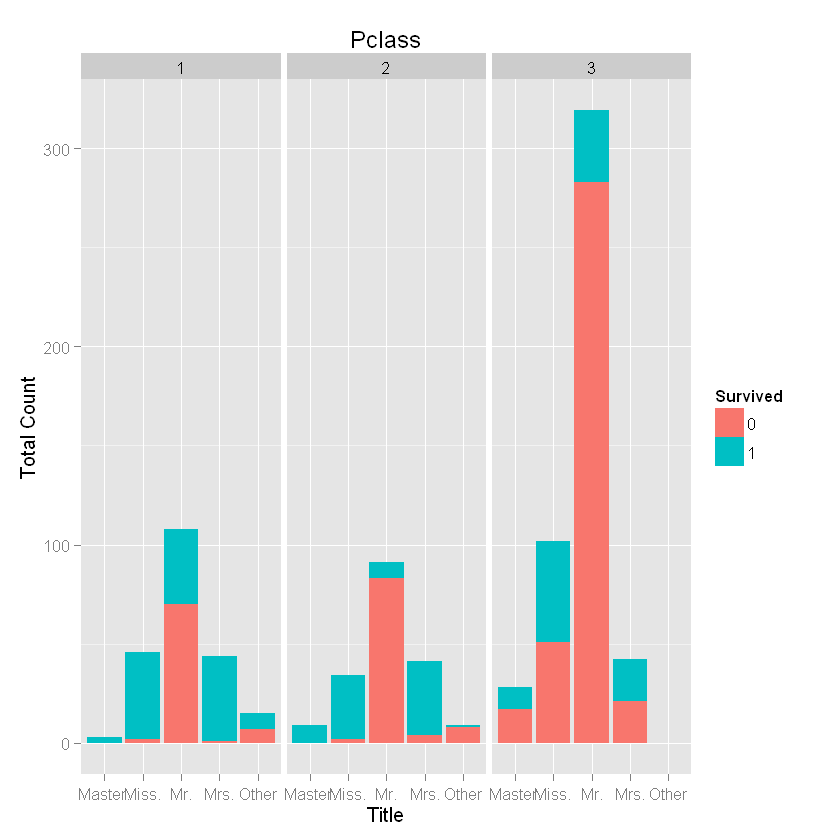

In [15]:
# Let's plot this out now. Since we have Survived values only in the first 891 rows, just use those

ggplot(data.combined[1:891,], aes(x = Title, fill = Survived)) +
  geom_bar() +
  facet_wrap(~Pclass) +
  ggtitle("Pclass") +
  xlab("Title") +
  ylab("Total Count") +
  labs(fill = "Survived")

In [16]:
table(data.combined$Sex,data.combined$Survived)

        
           0   1 none
  female  81 233  152
  male   468 109  266

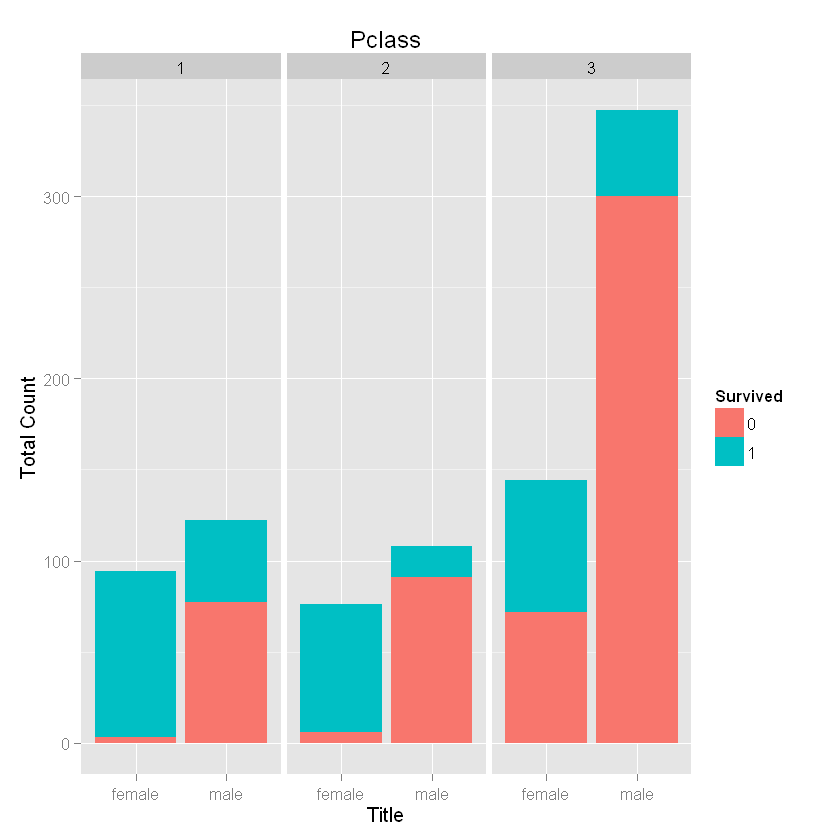

In [17]:
ggplot(data.combined[1:891,], aes(x = Sex, fill = Survived)) +
  geom_bar() +
  facet_wrap(~Pclass) +
  ggtitle("Pclass") +
  xlab("Title") +
  ylab("Total Count") +
  labs(fill = "Survived")

In [18]:
summary(data.combined$Age)
summary(data.combined[1:891,"Age"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.17   21.00   28.00   29.88   39.00   80.00     263 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.42   20.12   28.00   29.70   38.00   80.00     177 

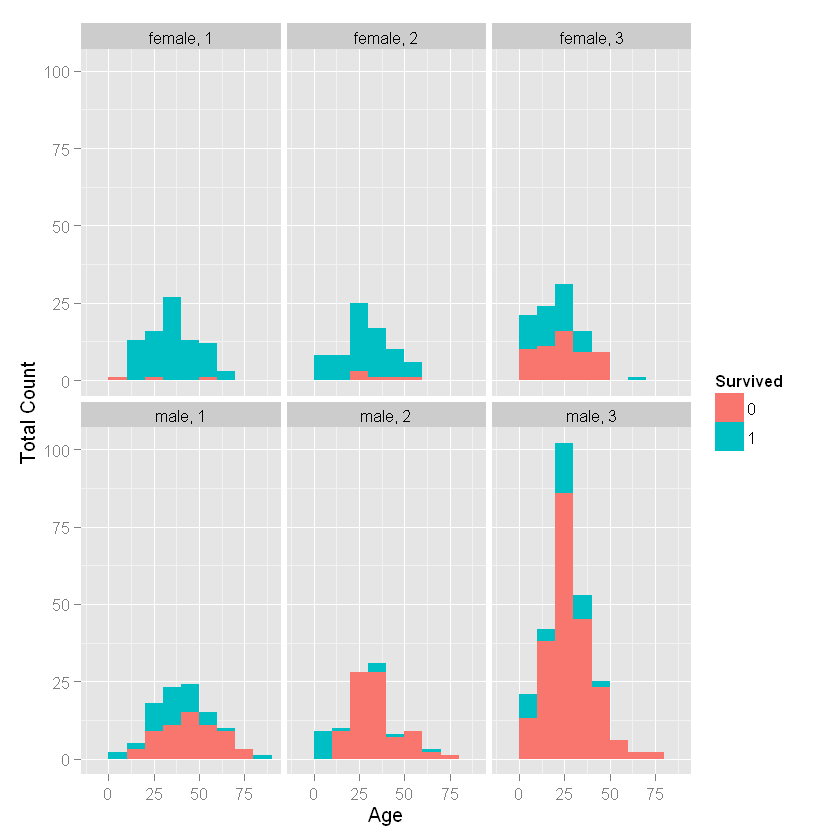

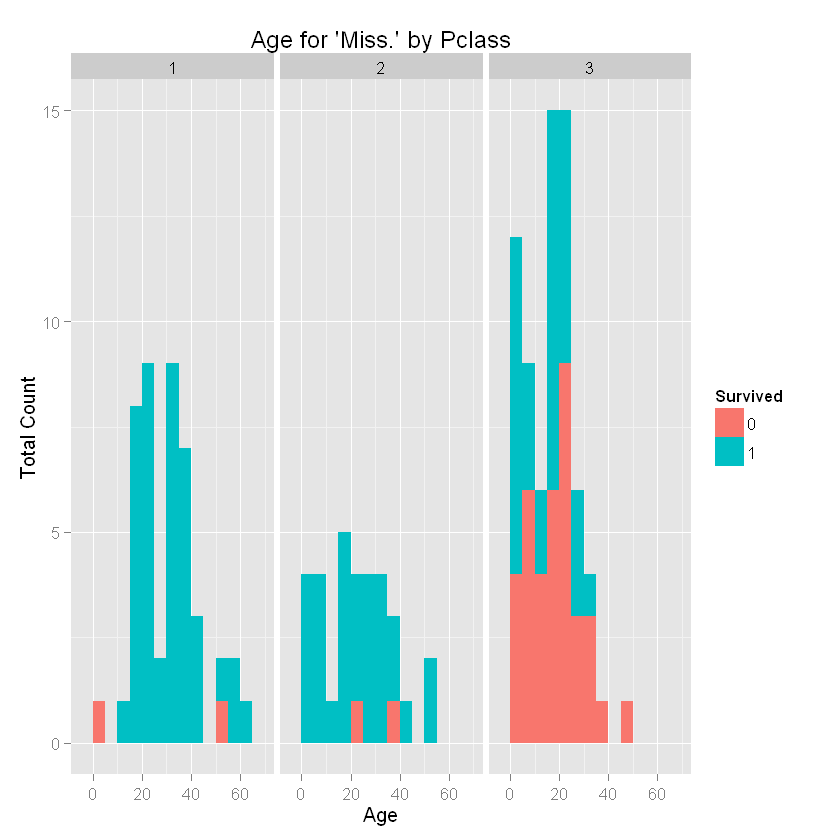

In [19]:
ggplot(data.combined[1:891,], aes(x=Age, fill=Survived)) +
  facet_wrap(~Sex+Pclass) +
  geom_histogram(binwidth = 10) +
  xlab("Age") +
  ylab("Total Count")

ggplot(misses[misses$Survived != "none",], aes(x=Age, fill=Survived)) +
  facet_wrap(~Pclass) +
  geom_histogram(binwidth = 5) +
  ggtitle("Age for 'Miss.' by Pclass") +
  xlab("Age") +
  ylab("Total Count")

In [20]:
boys <- data.combined[which(data.combined$Title == "Master."),]
summary(boys$Age)

summary(misses$Age)

misses.alone <- misses[which(misses$SibSp == 0 & misses$Parch == 0),]
summary(misses.alone$Age)
length(which(misses.alone$Age >= 15 & misses.alone$Age <= 25))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.330   2.000   4.000   5.483   9.000  14.500       8 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.17   15.00   22.00   21.77   30.00   63.00      50 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   5.00   21.00   26.00   27.23   32.50   58.00      33 

[1] 53

In [21]:
summary(misses.alone)

 Survived   PassengerId  Pclass                            Name    
 0   :25   3      :  1   1:36   Connolly, Miss. Kate         :  2  
 1   :75   12     :  1   2:25   Allen, Miss. Elisabeth Walton:  1  
 none:50   15     :  1   3:89   Attalah, Miss. Malake        :  1  
           23     :  1          Ayoub, Miss. Banoura         :  1  
           29     :  1          Barber, Miss. Ellen "Nellie" :  1  
           33     :  1          Bazzani, Miss. Albina        :  1  
           (Other):144          (Other)                      :143  
     Sex           Age            SibSp       Parch            Ticket   
 female:150   Min.   : 5.00   Min.   :0   Min.   :0   110152      :  2  
 male  :  0   1st Qu.:21.00   1st Qu.:0   1st Qu.:0   113781      :  2  
              Median :26.00   Median :0   Median :0   16966       :  2  
              Mean   :27.23   Mean   :0   Mean   :0   24160       :  2  
              3rd Qu.:32.50   3rd Qu.:0   3rd Qu.:0   364516      :  2  
              Max.

In [22]:
# Move on to the variable SibSp
summary(data.combined$SibSp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4989  1.0000  8.0000 

In [23]:
length(unique(data.combined$SibSp))

[1] 7

In [24]:
data.combined$SibSp <- as.factor(data.combined$SibSp)

In [25]:
str(data.combined$SibSp)

 Factor w/ 7 levels "0","1","2","3",..: 2 2 1 2 1 1 1 4 1 2 ...


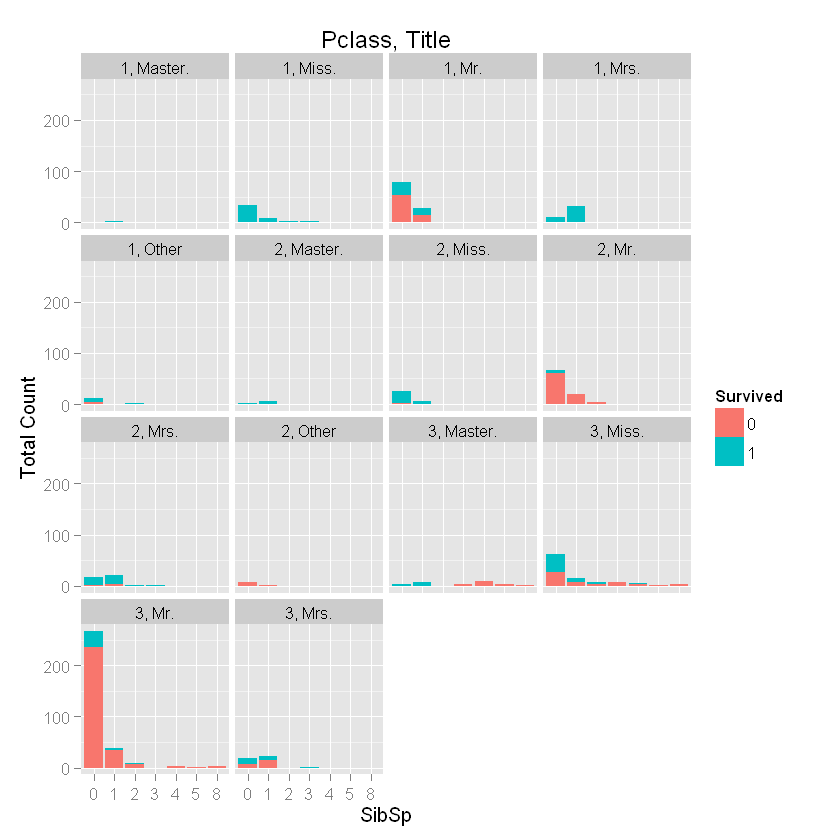

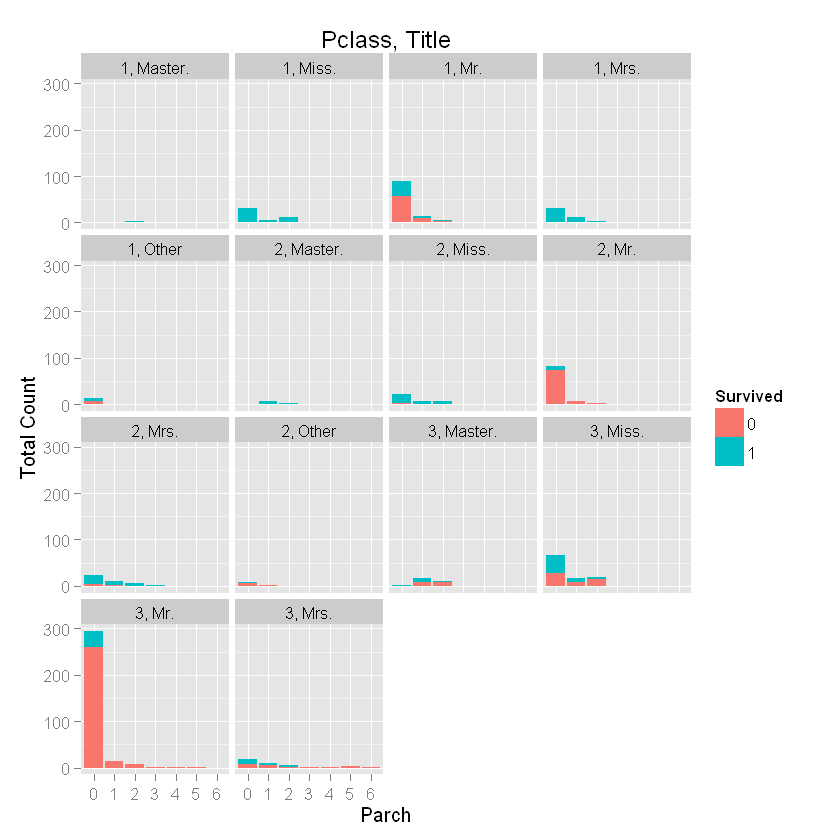

In [26]:
# Let's ggplot the variable SibSp in conjuction with Pclass and Title to get some interesting insights!

ggplot(data.combined[1:891,], aes(x=SibSp,fill = Survived)) +
  geom_bar() +
  facet_wrap(~Pclass + Title) +
  ggtitle("Pclass, Title") +
  xlab("SibSp")+
  ylab("Total Count") +
  labs(fill = "Survived")

data.combined$Parch <- as.factor(data.combined$Parch)

ggplot(data.combined[1:891,], aes(x=Parch,fill = Survived)) +
  geom_bar() +
  facet_wrap(~Pclass + Title) +
  ggtitle("Pclass, Title") +
  xlab("Parch")+
  ylab("Total Count") +
  labs(fill = "Survived")

In [27]:
temp.SibSp <- c(train$SibSp,test$SibSp)
temp.Parch <- c(train$Parch,test$Parch)
data.combined$FamilySize <- as.factor(temp.SibSp + temp.Parch + 1)

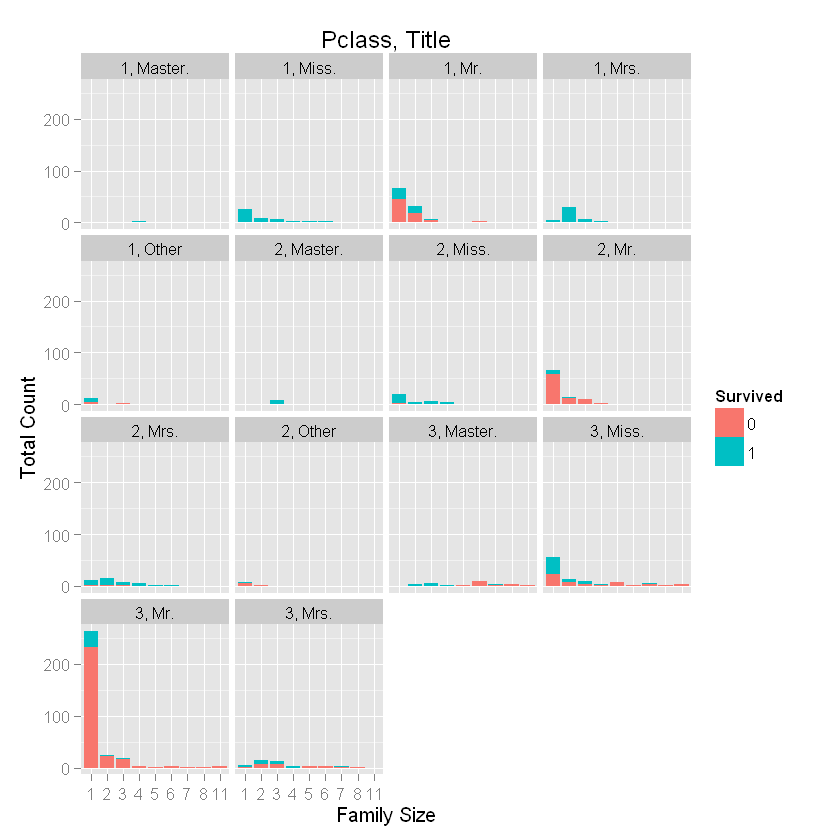

In [28]:
ggplot(data.combined[1:891,], aes(x=FamilySize, fill = Survived)) +
  geom_bar() +
  facet_wrap(~Pclass + Title) +
  ggtitle("Pclass, Title") +
  xlab("Family Size") +
  ylab("Total Count") +
  labs(fill = "Survived")

In [29]:
str(data.combined$Ticket)

 Factor w/ 929 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...


In [30]:
data.combined$Ticket <- as.character(data.combined$Ticket)
data.combined$Ticket[1:30]

[1] "A/5 21171"        "PC 17599"         "STON/O2. 3101282" "113803"          
 [5] "373450"           "330877"           "17463"            "349909"          
 [9] "347742"           "237736"           "PP 9549"          "113783"          
[13] "A/5. 2151"        "347082"           "350406"           "248706"          
[17] "382652"           "244373"           "345763"           "2649"            
[21] "239865"           "248698"           "330923"           "113788"          
[25] "349909"           "347077"           "2631"             "19950"           
[29] "330959"           "349216"

In [31]:
Ticket.first.char <- ifelse(data.combined$Ticket == "", " ", substr(data.combined$Ticket,1,1))
unique(Ticket.first.char)

[1] "A" "P" "S" "1" "3" "2" "C" "7" "W" "4" "F" "L" "9" "6" "5" "8"

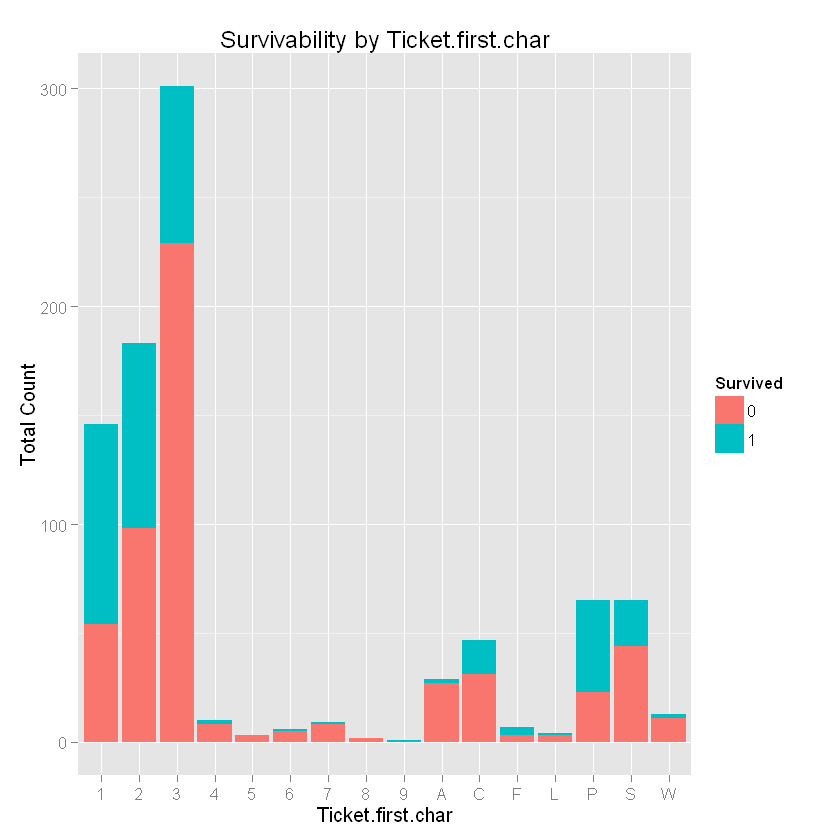

In [32]:
data.combined$Ticket.first.char <- as.factor(Ticket.first.char)

ggplot(data.combined[1:891,],aes(x = Ticket.first.char, fill = Survived)) +
  geom_bar() +
  ggtitle("Survivability by Ticket.first.char") +
  xlab("Ticket.first.char") +
  ylab("Total Count") +
  labs(fill = "Survived")

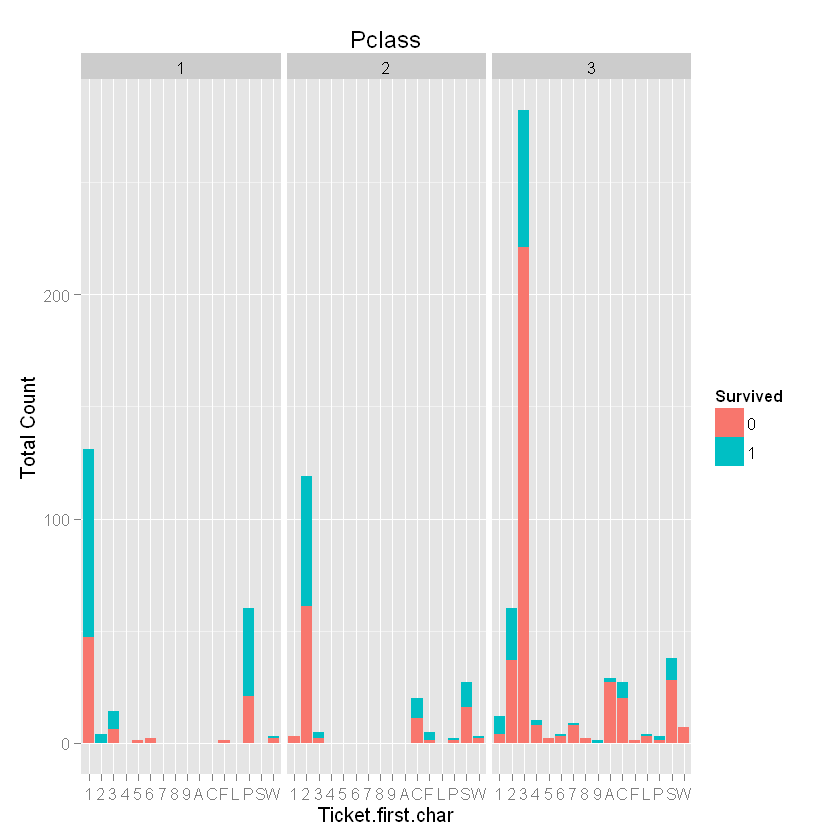

In [33]:
ggplot(data.combined[1:891,],aes(x = Ticket.first.char, fill = Survived)) +
  geom_bar() +
  facet_wrap(~Pclass) +
  ggtitle("Pclass") +
  xlab("Ticket.first.char") +
  ylab("Total Count") +
  labs(fill = "Survived")

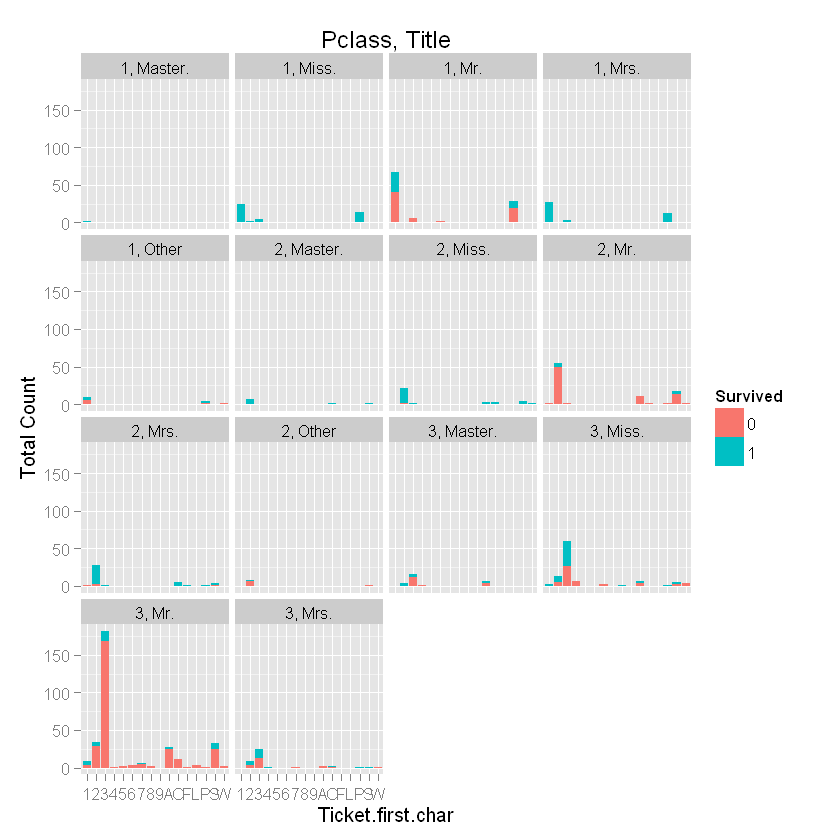

In [34]:
ggplot(data.combined[1:891,],aes(x = Ticket.first.char, fill = Survived)) +
  geom_bar() +
  facet_wrap(~Pclass + Title) +
  ggtitle("Pclass, Title") +
  xlab("Ticket.first.char") +
  ylab("Total Count") +
  labs(fill = "Survived")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   7.896  14.450  33.300  31.280 512.300       1 

[1] 282

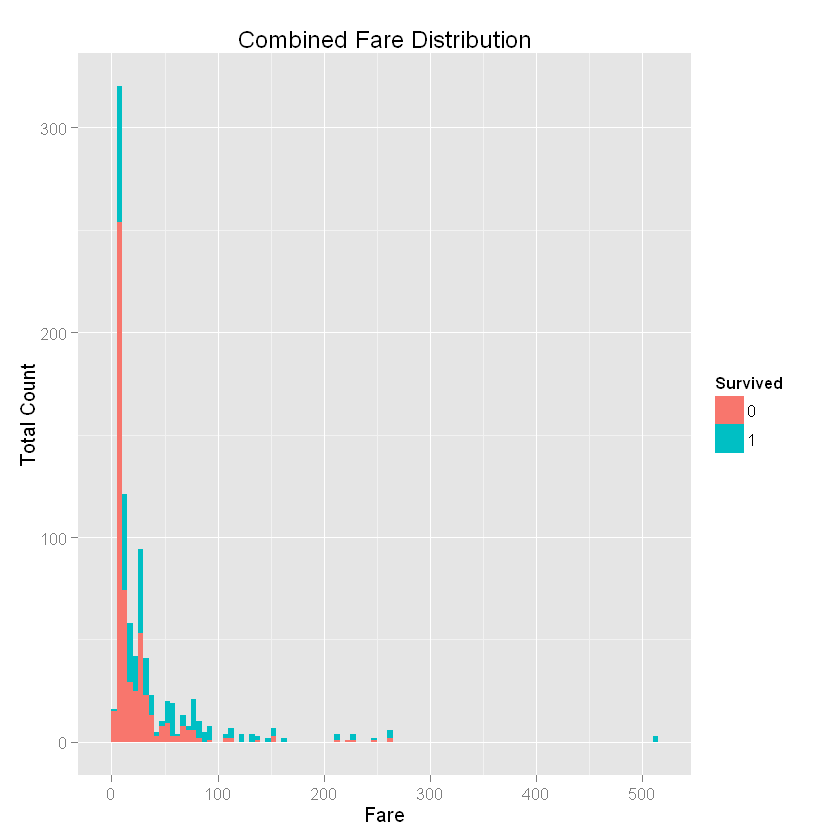

In [35]:
# Now Fares

summary(data.combined$Fare)
length(unique(data.combined$Fare))

ggplot(data.combined[1:891,],aes(x=Fare,fill=Survived))+
  geom_histogram(binwidth = 5)+
  ggtitle("Combined Fare Distribution")+
  xlab("Fare")+
  ylab("Total Count")

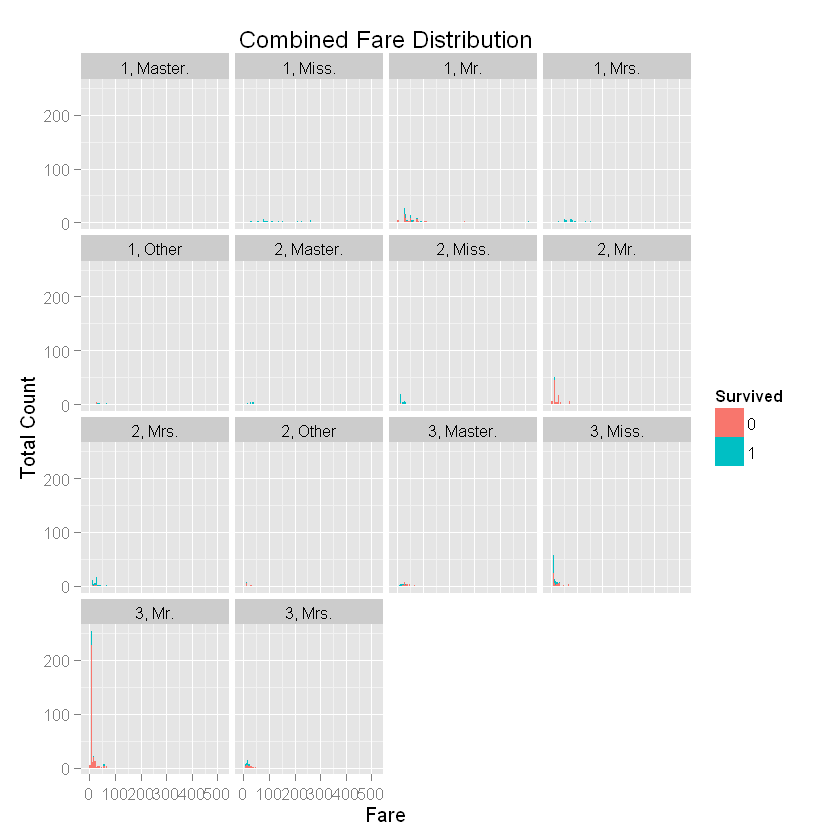

In [36]:
ggplot(data.combined[1:891,],aes(x=Fare,fill=Survived))+
  geom_histogram(binwidth = 5)+
  facet_wrap(~Pclass + Title)+
  ggtitle("Combined Fare Distribution")+
  xlab("Fare")+
  ylab("Total Count")

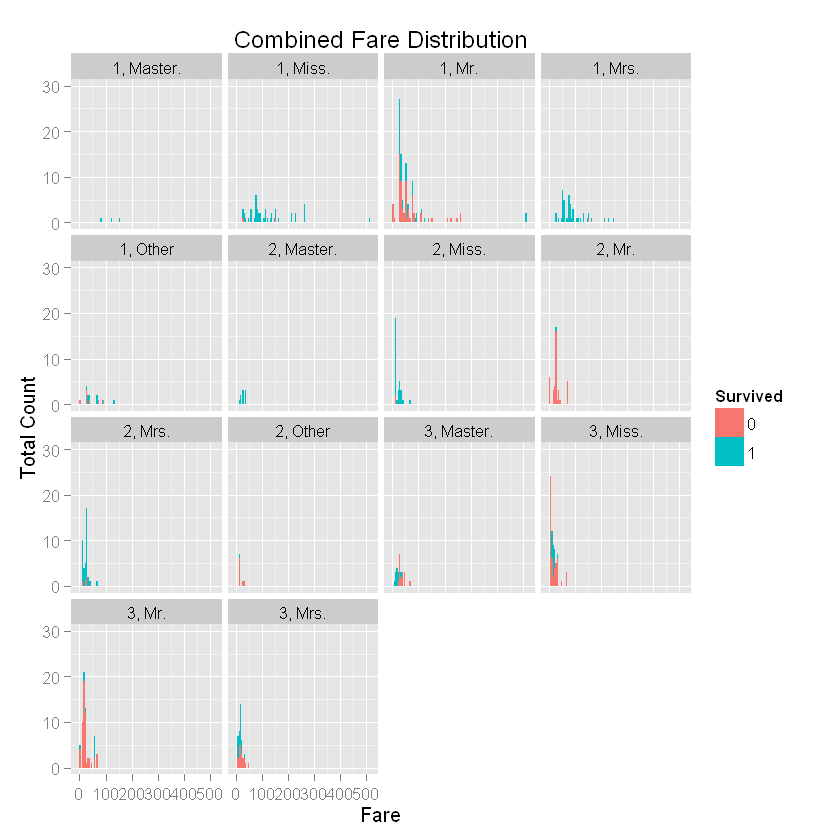

In [37]:
ggplot(data.combined[1:891,],aes(x=Fare,fill=Survived))+
  geom_histogram(binwidth = 5)+
  facet_wrap(~Pclass + Title)+
  ggtitle("Combined Fare Distribution")+
  xlab("Fare")+
  ylab("Total Count")+
  ylim(0,30)

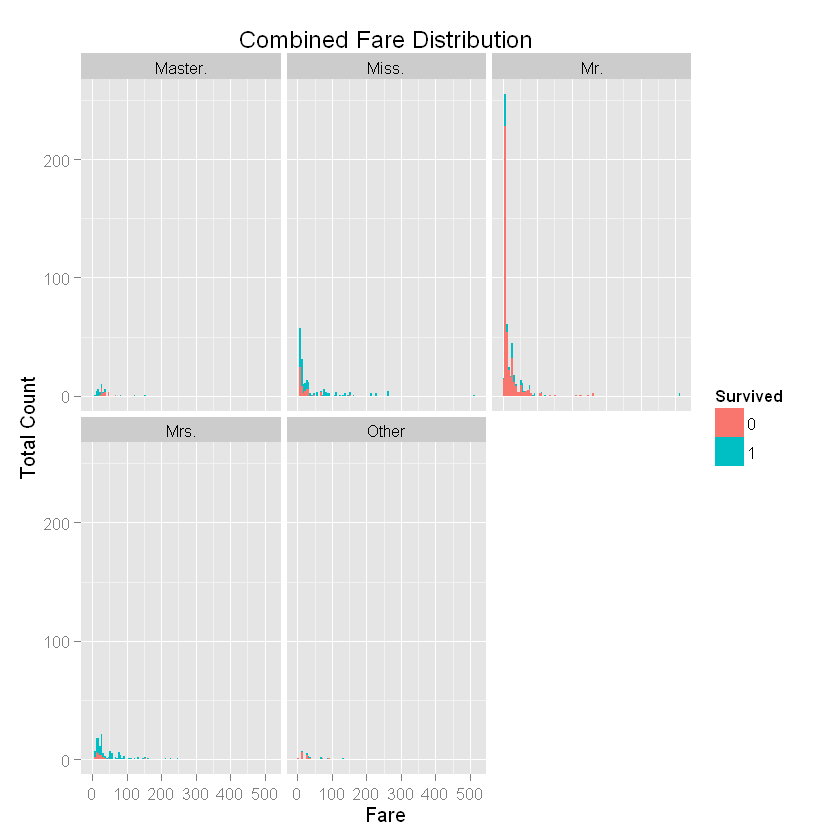

In [38]:
ggplot(data.combined[1:891,],aes(x=Fare,fill=Survived))+
  geom_histogram(binwidth = 5)+
  facet_wrap(~Title)+
  ggtitle("Combined Fare Distribution")+
  xlab("Fare")+
  ylab("Total Count")

In [39]:
# Now Cabin

str(data.combined$Cabin)

data.combined$Cabin <- as.character(data.combined$Cabin)
data.combined$Cabin[1:100]

data.combined[which(data.combined$Cabin == ""),"Cabin"] <- "U"
data.combined$Cabin[1:100]

Cabin.first.char <- as.factor(substr(data.combined$Cabin,1,1))
unique(Cabin.first.char)
levels(Cabin.first.char)

data.combined$Cabin.first.char <- Cabin.first.char

 Factor w/ 187 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...


[1] ""            "C85"         ""            "C123"        ""           
  [6] ""            "E46"         ""            ""            ""           
 [11] "G6"          "C103"        ""            ""            ""           
 [16] ""            ""            ""            ""            ""           
 [21] ""            "D56"         ""            "A6"          ""           
 [26] ""            ""            "C23 C25 C27" ""            ""           
 [31] ""            "B78"         ""            ""            ""           
 [36] ""            ""            ""            ""            ""           
 [41] ""            ""            ""            ""            ""           
 [46] ""            ""            ""            ""            ""           
 [51] ""            ""            "D33"         ""            "B30"        
 [56] "C52"         ""            ""            ""            ""           
 [61] ""            "B28"         "C83"         ""            ""           
 [66] ""            "F33"         ""            ""            ""           
 [71] ""            ""            ""            ""            ""           
 [76] "F G73"       ""            ""            ""            ""           
 [81] ""            ""            ""            ""            ""           
 [86] ""            ""            ""            "C23 C25 C27" ""           
 [91] ""            ""            "E31"         ""            ""           
 [96] ""            "A5"          "D10 D12"     ""            ""

[1] "U"           "C85"         "U"           "C123"        "U"          
  [6] "U"           "E46"         "U"           "U"           "U"          
 [11] "G6"          "C103"        "U"           "U"           "U"          
 [16] "U"           "U"           "U"           "U"           "U"          
 [21] "U"           "D56"         "U"           "A6"          "U"          
 [26] "U"           "U"           "C23 C25 C27" "U"           "U"          
 [31] "U"           "B78"         "U"           "U"           "U"          
 [36] "U"           "U"           "U"           "U"           "U"          
 [41] "U"           "U"           "U"           "U"           "U"          
 [46] "U"           "U"           "U"           "U"           "U"          
 [51] "U"           "U"           "D33"         "U"           "B30"        
 [56] "C52"         "U"           "U"           "U"           "U"          
 [61] "U"           "B28"         "C83"         "U"           "U"          
 [66] "U"           "F33"         "U"           "U"           "U"          
 [71] "U"           "U"           "U"           "U"           "U"          
 [76] "F G73"       "U"           "U"           "U"           "U"          
 [81] "U"           "U"           "U"           "U"           "U"          
 [86] "U"           "U"           "U"           "C23 C25 C27" "U"          
 [91] "U"           "U"           "E31"         "U"           "U"          
 [96] "U"           "A5"          "D10 D12"     "U"           "U"

[1] U C E G D A B F T
Levels: A B C D E F G T U

[1] "A" "B" "C" "D" "E" "F" "G" "T" "U"

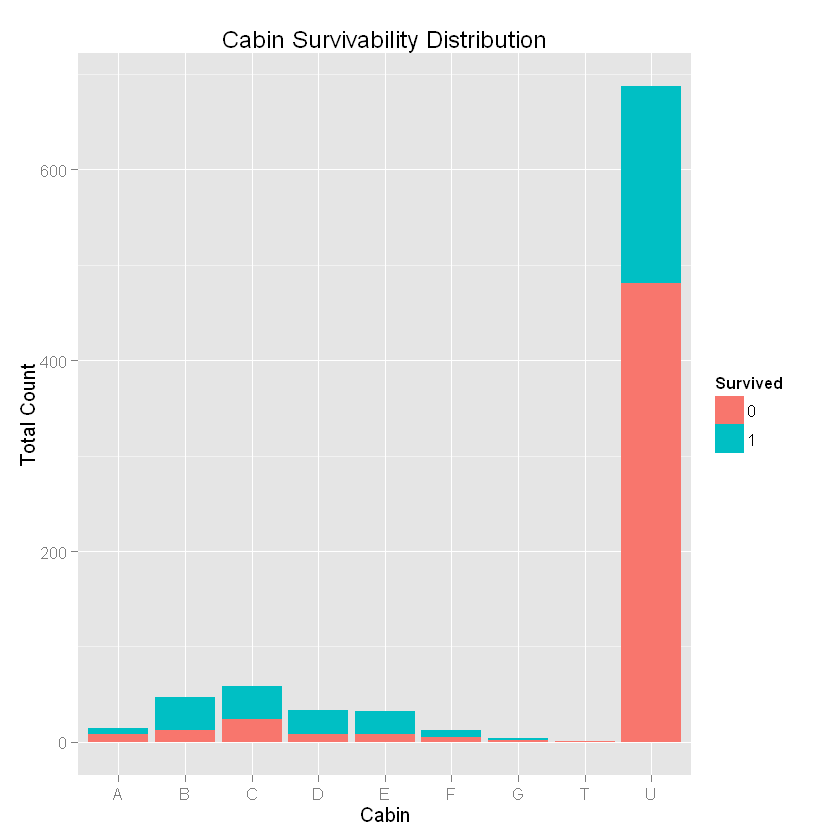

In [40]:
ggplot(data.combined[1:891,], aes(x = Cabin.first.char, fill = Survived))+
  geom_bar()+
  ggtitle("Cabin Survivability Distribution")+
  xlab("Cabin")+
  ylab("Total Count")

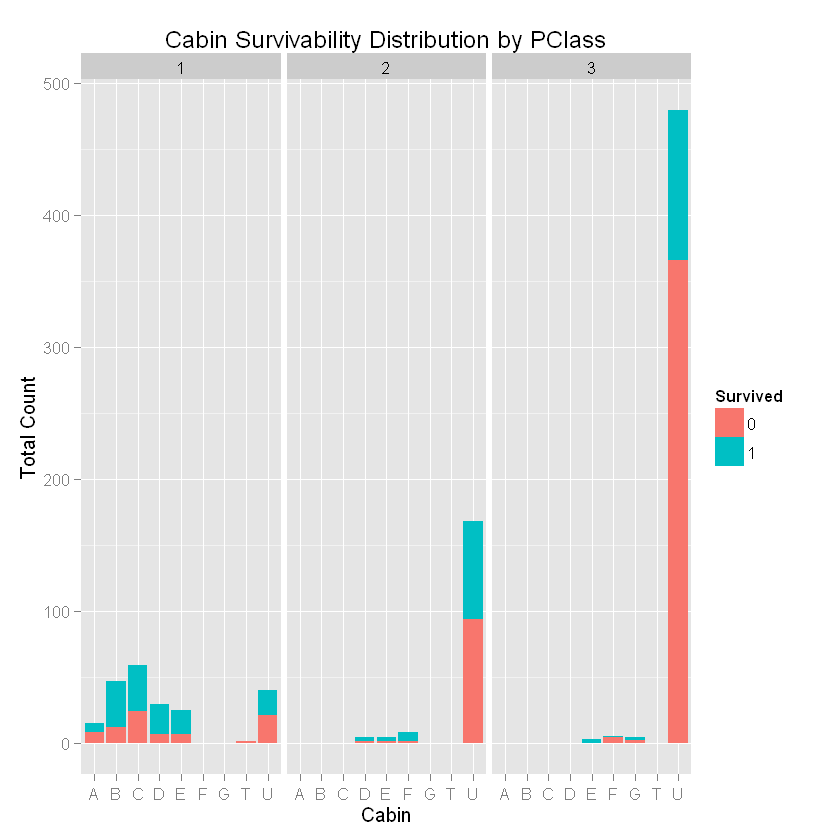

In [41]:
ggplot(data.combined[1:891,], aes(x = Cabin.first.char, fill = Survived))+
  geom_bar()+
  facet_wrap(~Pclass)+
  ggtitle("Cabin Survivability Distribution by PClass")+
  xlab("Cabin")+
  ylab("Total Count")

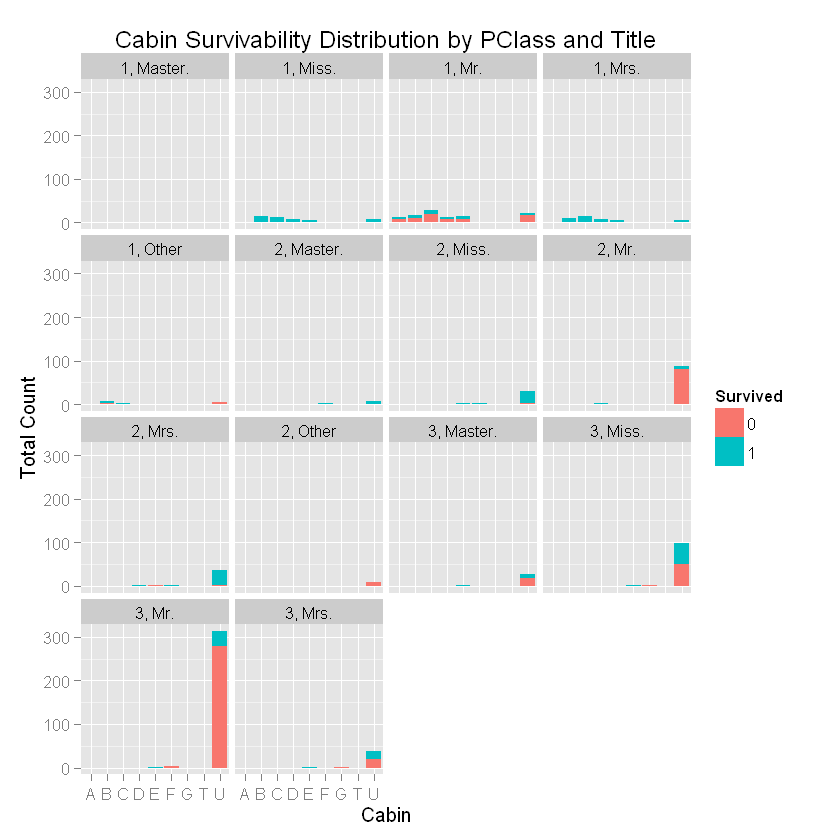

In [42]:
ggplot(data.combined[1:891,], aes(x = Cabin.first.char, fill = Survived))+
  geom_bar()+
  facet_wrap(~Pclass + Title)+
  ggtitle("Cabin Survivability Distribution by PClass and Title")+
  xlab("Cabin")+
  ylab("Total Count")

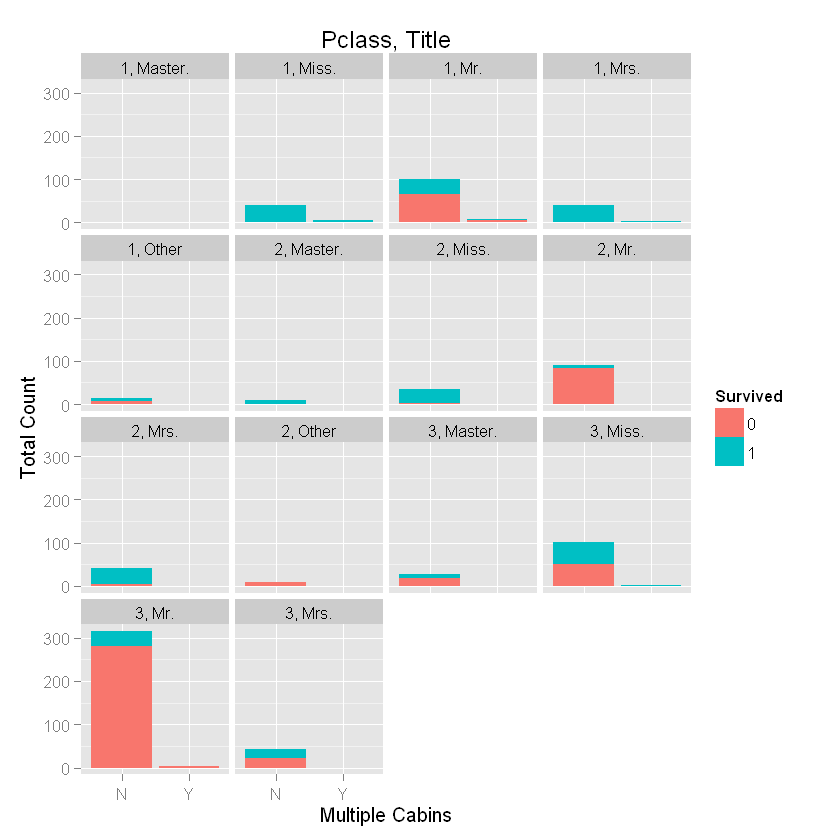

In [43]:
# Let's look at passengers with multiple cabinss

data.combined$Cabin.multiple <- as.factor(ifelse(str_detect(data.combined$Cabin, " "), "Y", "N"))

ggplot(data.combined[1:891,], aes(x = Cabin.multiple, fill = Survived))+
  geom_bar()+
  facet_wrap(~Pclass + Title)+
  ggtitle("Pclass, Title")+
  xlab("Multiple Cabins")+
  ylab("Total Count")+
  labs(fill = "Survived")

 Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


[1] ""  "C" "Q" "S"

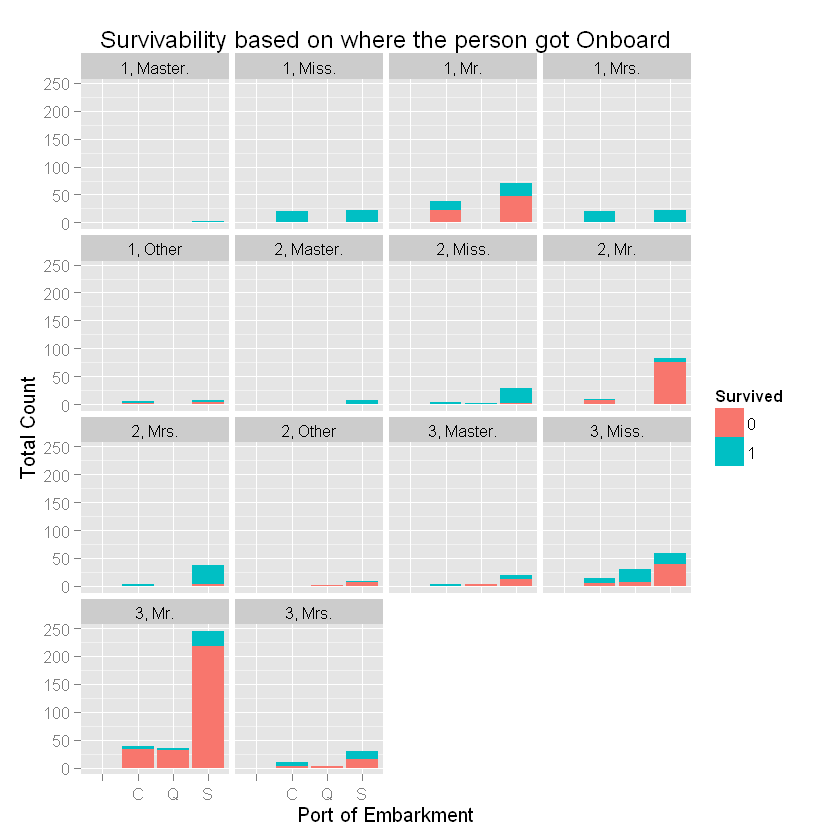

In [44]:
# Ok. Lastly let's have a look at survivability based on embarkment

str(data.combined$Embarked)
levels(data.combined$Embarked)

ggplot(data.combined[1:891,], aes(x = Embarked, fill = Survived))+
  geom_bar()+
  facet_wrap(~Pclass + Title)+
  ggtitle("Survivability based on where the person got Onboard")+
  xlab("Port of Embarkment")+
  ylab("Total Count")+
  labs(fill = "Survived")

In [45]:
# Ok. We have completed working on all the variables!

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.



Call:
 randomForest(x = rf.train.1, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 1

        OOB estimate of  error rate: 20.76%
Confusion matrix:
    0   1 class.error
0 538  11  0.02003643
1 174 168  0.50877193

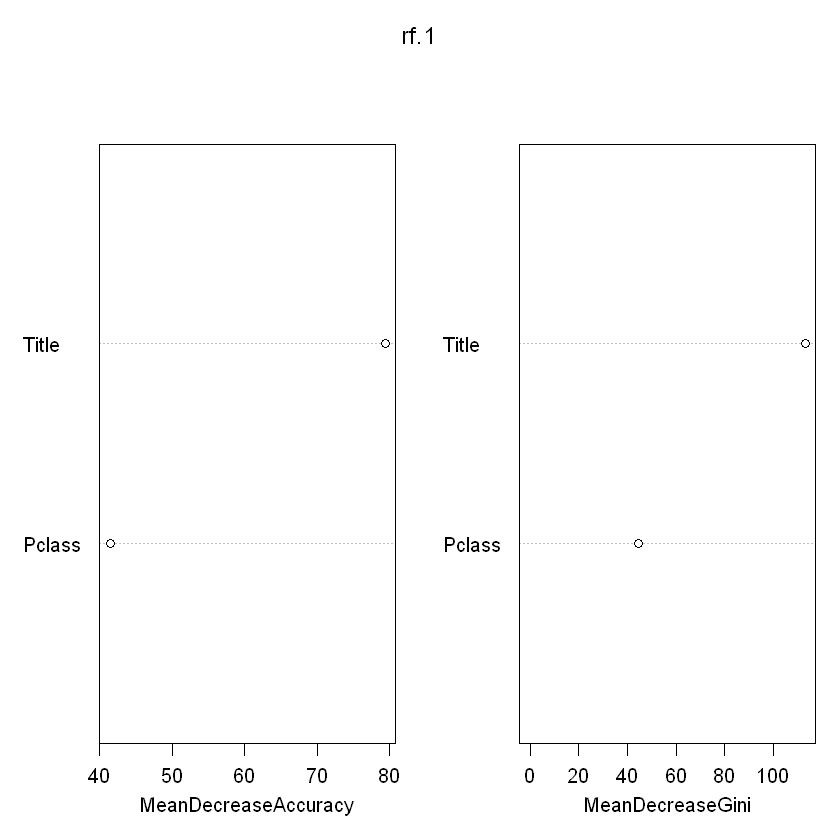

In [46]:
#----------------------------------------------------------------------------------
#
#                        EXPLORATORY MODELING
#
#----------------------------------------------------------------------------------

# Let's use randomForest for this

library(randomForest)

#MODEL 1
# Train a Random Forest with default variables using Pclass and Title
rf.train.1 <- data.combined[1:891, c("Pclass", "Title")]
rf.label <- as.factor(train$Survived)

set.seed(1234)
rf.1 <- randomForest(x = rf.train.1, y = rf.label, importance = TRUE, ntree = 1000)
rf.1
varImpPlot(rf.1)


Call:
 randomForest(x = rf.train.2, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 1

        OOB estimate of  error rate: 19.75%
Confusion matrix:
    0   1 class.error
0 487  62   0.1129326
1 114 228   0.3333333

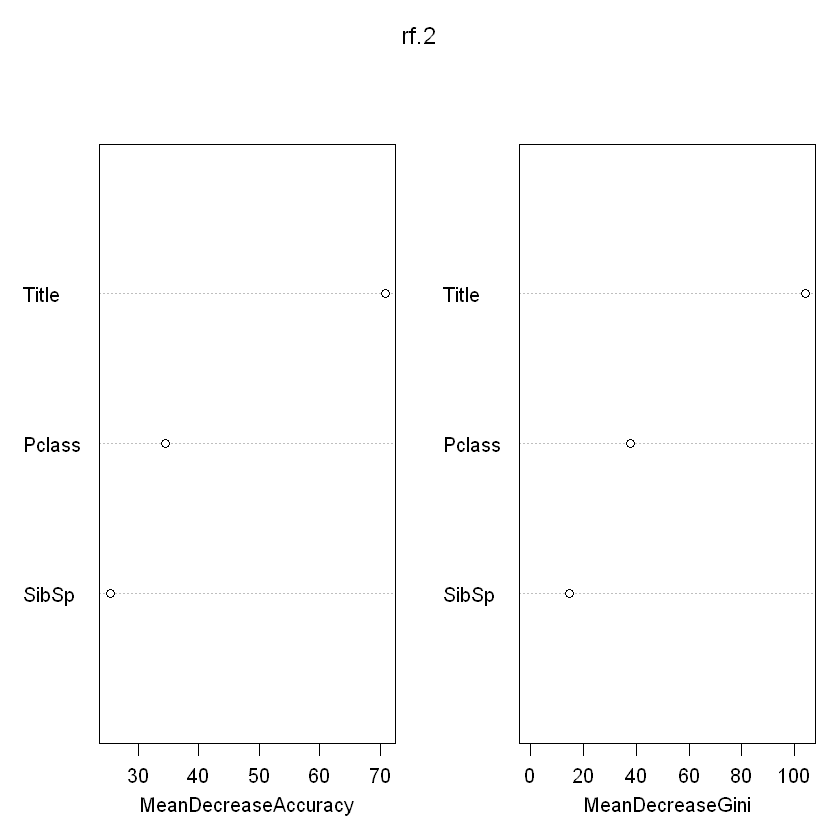

In [47]:
#MODEL 2
# Train a Random Forest with using Pclass, Title, and SibSp
rf.train.2 <- data.combined[1:891, c("Pclass", "Title", "SibSp")]

set.seed(1234)
rf.2 <- randomForest(x = rf.train.2, y = rf.label, importance = TRUE, ntree = 1000)
rf.2
varImpPlot(rf.2)


Call:
 randomForest(x = rf.train.3, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 1

        OOB estimate of  error rate: 19.98%
Confusion matrix:
    0   1 class.error
0 495  54  0.09836066
1 124 218  0.36257310

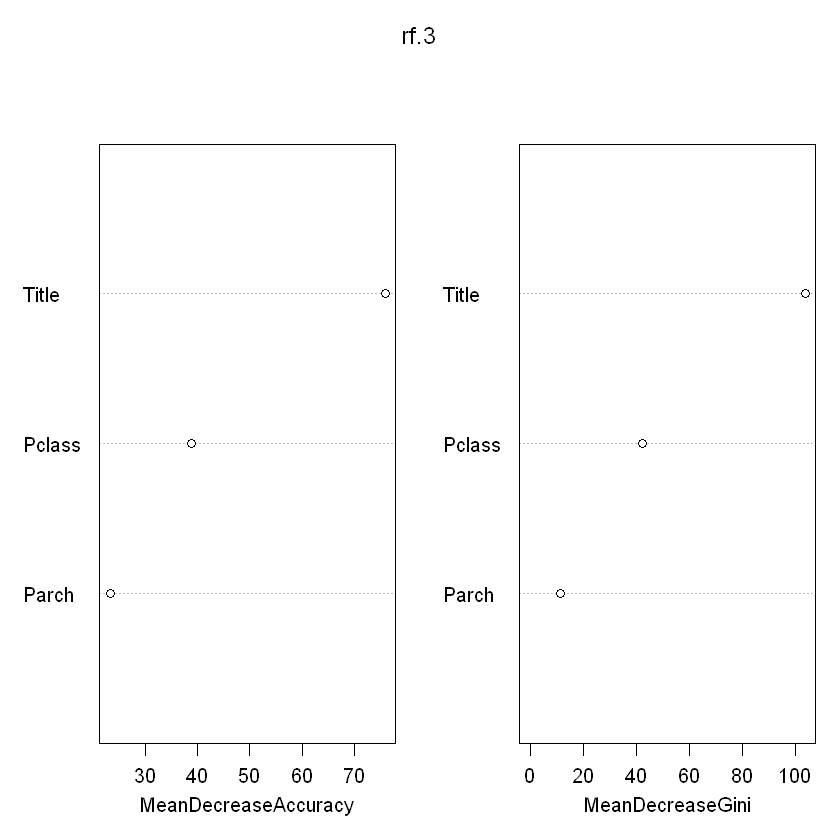

In [48]:
#MODEL 3
# Train a Random Forest with using Pclass, Title, and Parch
rf.train.3 <- data.combined[1:891, c("Pclass", "Title", "Parch")]

set.seed(1234)
rf.3 <- randomForest(x = rf.train.3, y = rf.label, importance = TRUE, ntree = 1000)
rf.3
varImpPlot(rf.3)


Call:
 randomForest(x = rf.train.4, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 18.52%
Confusion matrix:
    0   1 class.error
0 489  60   0.1092896
1 105 237   0.3070175

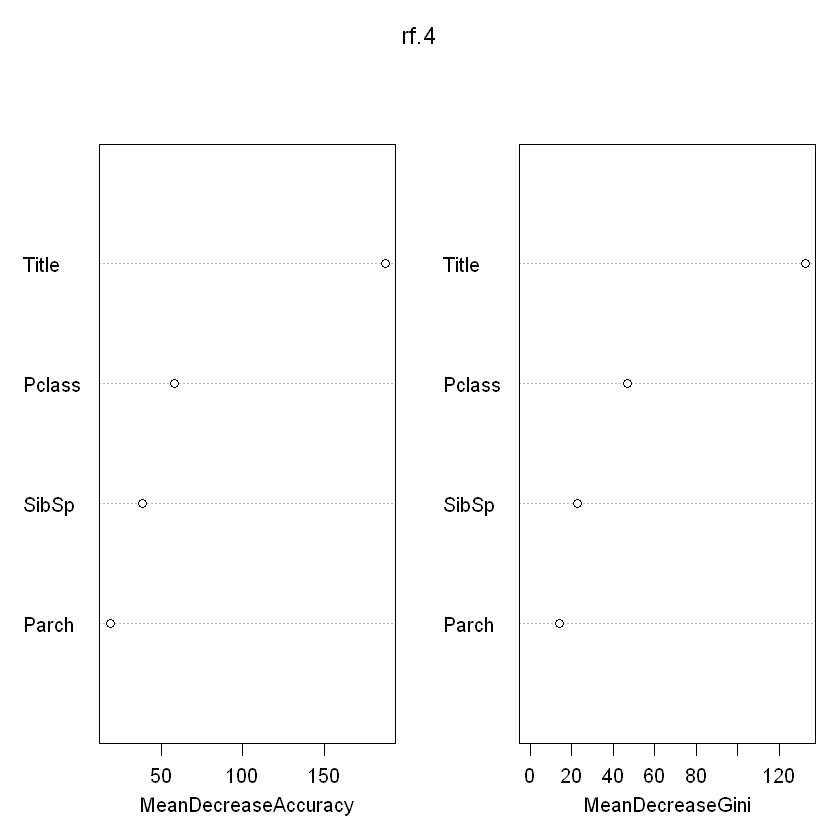

In [49]:
#MODEL 4
# Train a Random Forest with using Pclass, Title, SibSp and Parch
rf.train.4 <- data.combined[1:891, c("Pclass", "Title", "SibSp", "Parch")]

set.seed(1234)
rf.4 <- randomForest(x = rf.train.4, y = rf.label, importance = TRUE, ntree = 1000)
rf.4
varImpPlot(rf.4)


Call:
 randomForest(x = rf.train.5, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 1

        OOB estimate of  error rate: 18.41%
Confusion matrix:
    0   1 class.error
0 485  64   0.1165756
1 100 242   0.2923977

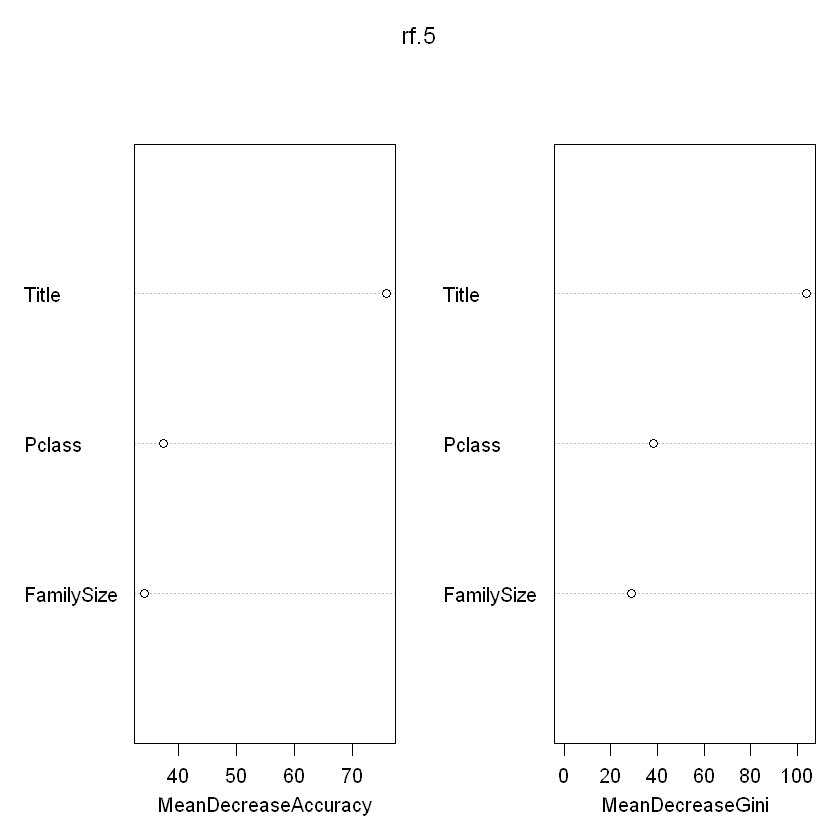

In [50]:
#MODEL 5
# Train a Random Forest with using Pclass, Title, and FamilySize
rf.train.5 <- data.combined[1:891, c("Pclass", "Title", "FamilySize")]

set.seed(1234)
rf.5 <- randomForest(x = rf.train.5, y = rf.label, importance = TRUE, ntree = 1000)
rf.5
varImpPlot(rf.5)


Call:
 randomForest(x = rf.train.6, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 18.74%
Confusion matrix:
    0   1 class.error
0 486  63   0.1147541
1 104 238   0.3040936

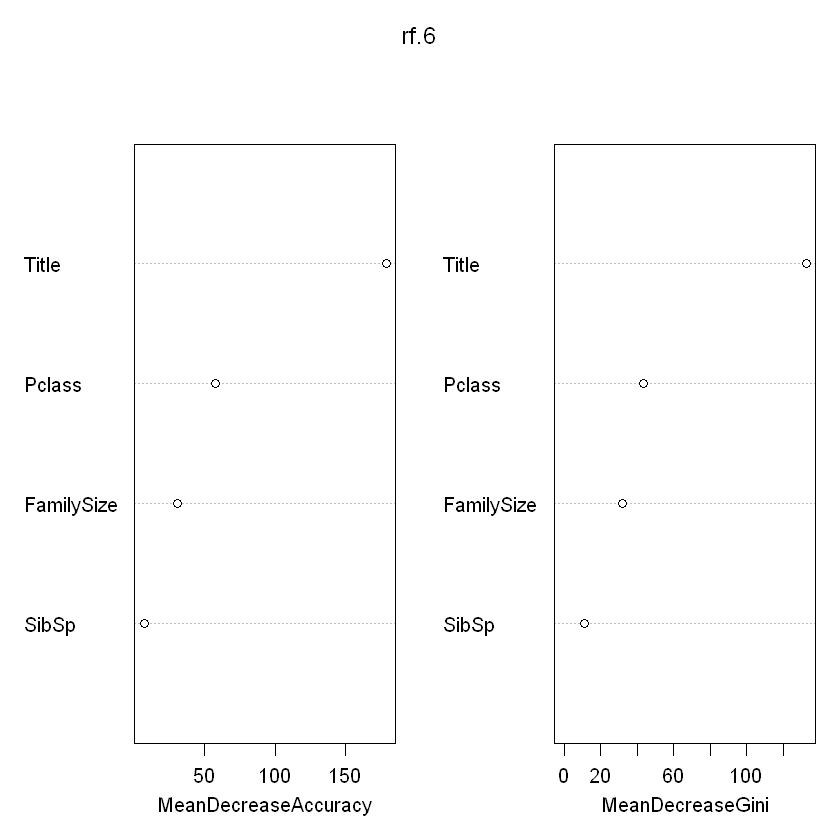

In [51]:
#MODEL 6
# Train a Random Forest with using Pclass, Title, SibSp and FamilySize
rf.train.6 <- data.combined[1:891, c("Pclass", "Title", "SibSp", "FamilySize")]

set.seed(1234)
rf.6 <- randomForest(x = rf.train.6, y = rf.label, importance = TRUE, ntree = 1000)
rf.6
varImpPlot(rf.6)


Call:
 randomForest(x = rf.train.7, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 18.97%
Confusion matrix:
    0   1 class.error
0 486  63   0.1147541
1 106 236   0.3099415

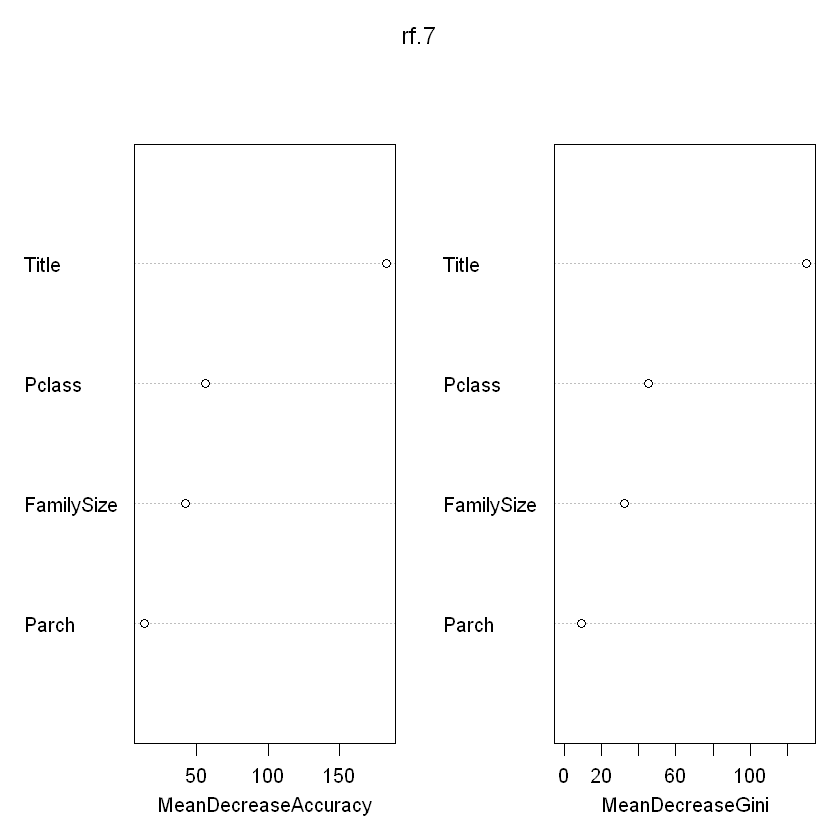

In [52]:
#MODEL 7
# Train a Random Forest with using Pclass, Title, Parch and FamilySize
rf.train.7 <- data.combined[1:891, c("Pclass", "Title", "Parch", "FamilySize")]

set.seed(1234)
rf.7 <- randomForest(x = rf.train.7, y = rf.label, importance = TRUE, ntree = 1000)
rf.7
varImpPlot(rf.7)


Call:
 randomForest(x = rf.train.8, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 19.42%
Confusion matrix:
    0   1 class.error
0 483  66   0.1202186
1 107 235   0.3128655

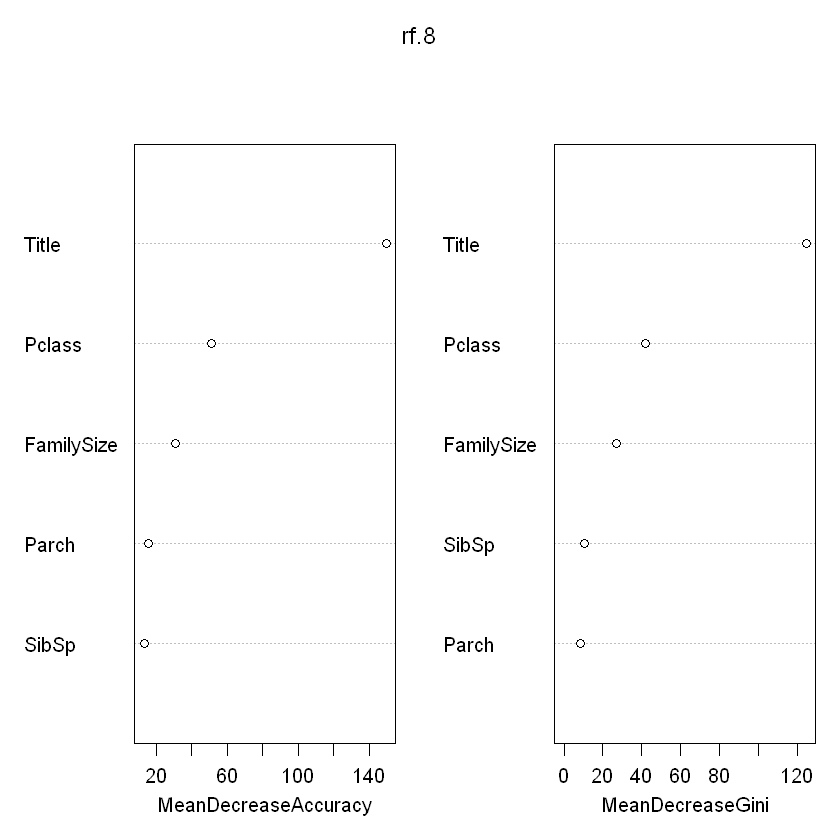

In [53]:
#MODEL 8
# Train a Random Forest with using Pclass, Title, Parch, SibSp and FamilySize
rf.train.8 <- data.combined[1:891, c("Pclass", "Title", "Parch", "SibSp", "FamilySize")]

set.seed(1234)
rf.8 <- randomForest(x = rf.train.8, y = rf.label, importance = TRUE, ntree = 1000)
rf.8
varImpPlot(rf.8)

In [54]:
####################################################################################
#                                                                                  #
#                                   DATA VALIDATION                                #
#                                                                                  #
####################################################################################

# Let's extract the prediction data
test.submit.df <- data.combined[892:1309, c("Pclass","Title","FamilySize")]

# Make Predictions
rf.5.preds <- predict(rf.5, test.submit.df)
table(rf.5.preds)

rf.5.preds
  0   1 
258 160 

In [55]:
library(caret)
library(doSNOW)

set.seed(2348)
cv.10.folds <- createMultiFolds(rf.label, k = 10, times = 10)

Loading required package: lattice
Loading required package: foreach
Loading required package: iterators
Loading required package: snow


In [56]:
table(rf.label)
342/549

table(rf.label[cv.10.folds[[33]]])
308/494

rf.label
  0   1 
549 342 

[1] 0.6229508


  0   1 
494 308 

[1] 0.6234818

In [57]:
ctrl.1 <- trainControl(method = "repeatedcv", number = 10, repeats = 10, index = cv.10.folds)

cl <- makeCluster(6, type = "SOCK")
registerDoSNOW(cl)

set.seed(34324)
rf.5.cv.1 <- train(x = rf.train.5, y = rf.label, method = "rf", tuneLength = 3, ntree = 1000, trControl = ctrl.1)

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



In [58]:
# Now let's stop the cluster
stopCluster(cl)

In [59]:
# Let's have a look at the results
rf.5.cv.1

Random Forest 

891 samples
  3 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 801, 802, 802, 803, 802, 801, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8121316  0.5929087
  3     0.8089966  0.5852138

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 2. 

In [60]:
# Try to do the same with smaller amount of data
set.seed(5983)
cv.5.folds <- createMultiFolds(rf.label, k = 5, times = 10)

ctrl.2 <- trainControl(method = "repeatedcv", number = 5, repeats = 10, index = cv.5.folds)

cl <- makeCluster(6, type = "SOCK")
registerDoSNOW(cl)

set.seed(89472)
rf.5.cv.2 <- train(x = rf.train.5, y = rf.label, method = "rf", tuneLength = 3, ntree = 1000, trControl = ctrl.2)
stopCluster(cl)
rf.5.cv.2

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Random Forest 

891 samples
  3 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 10 times) 
Summary of sample sizes: 713, 713, 713, 713, 712, 713, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8128009  0.5958137
  3     0.8092105  0.5875778

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 2. 

In [61]:
# Try to do the same with 3-fold
set.seed(37596)
cv.3.folds <- createMultiFolds(rf.label, k = 3, times = 10)

ctrl.3 <- trainControl(method = "repeatedcv", number = 3, repeats = 10, index = cv.3.folds)

cl <- makeCluster(6, type = "SOCK")
registerDoSNOW(cl)

set.seed(94622)
rf.5.cv.3 <- train(x = rf.train.5, y = rf.label, method = "rf", tuneLength = 3, ntree = 64, trControl = ctrl.3)
stopCluster(cl)
rf.5.cv.3

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Random Forest 

891 samples
  3 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 10 times) 
Summary of sample sizes: 594, 594, 594, 594, 594, 594, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8098765  0.5859242
  3     0.8062851  0.5772994

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 2. 

In [62]:
###################################################################################
#                                                                                 #
#                           EXPLORATORY MODELING # 2                              #
#                                                                                 #
###################################################################################
library(rpart)
library(rpart.plot)

In [63]:
rpart.cv <- function(seed, training, labels, ctrl) {
  cl <- makeCluster(6, type = "SOCK")
  registerDoSNOW(cl)
  
  set.seed(seed)
  rpart.cv <- train(x = training, y = rf.label, method = "rpart", tuneLength = 30, trControl = ctrl)
  
  stopCluster(cl)
  
  return(rpart.cv)
}

In [64]:
features <- c("Pclass","Title","FamilySize")
rpart.train.1 <- data.combined[1:891, features]

rpart.1.cv.1 <- rpart.cv(94622, rpart.train.1, rf.label, ctrl.3)
rpart.1.cv.1

CART 

891 samples
  3 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 10 times) 
Summary of sample sizes: 594, 594, 594, 594, 594, 594, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.00000000  0.8093154  0.5872691
  0.01542650  0.8151515  0.6021814
  0.03085299  0.8170595  0.6073245
  0.04627949  0.8035915  0.5819021
  0.06170599  0.7866442  0.5481020
  0.07713249  0.7877666  0.5520131
  0.09255898  0.7869809  0.5506934
  0.10798548  0.7832772  0.5443564
  0.12341198  0.7821549  0.5426317
  0.13883848  0.7820426  0.5427793
  0.15426497  0.7820426  0.5427793
  0.16969147  0.7820426  0.5427793
  0.18511797  0.7820426  0.5427793
  0.20054446  0.7820426  0.5427793
  0.21597096  0.7820426  0.5427793
  0.23139746  0.7820426  0.5427793
  0.24682396  0.7820426  0.5427793
  0.26225045  0.7820426  0.5427793
  0.27767695  0.7820426  0.5427793
  0.29310345  0.7820426  0.5427793
  0.30852995  0.7820426  0.

n= 891 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 891 342 0 (0.61616162 0.38383838)  
   2) Title=Mr.,Other 542  91 0 (0.83210332 0.16789668) *
   3) Title=Master.,Miss.,Mrs. 349  98 1 (0.28080229 0.71919771)  
     6) Pclass=3 172  83 0 (0.51744186 0.48255814)  
      12) FamilySize=5,6,8,11 34   0 0 (1.00000000 0.00000000) *
      13) FamilySize=1,2,3,4,7 138  55 1 (0.39855072 0.60144928) *
     7) Pclass=1,2 177   9 1 (0.05084746 0.94915254) *

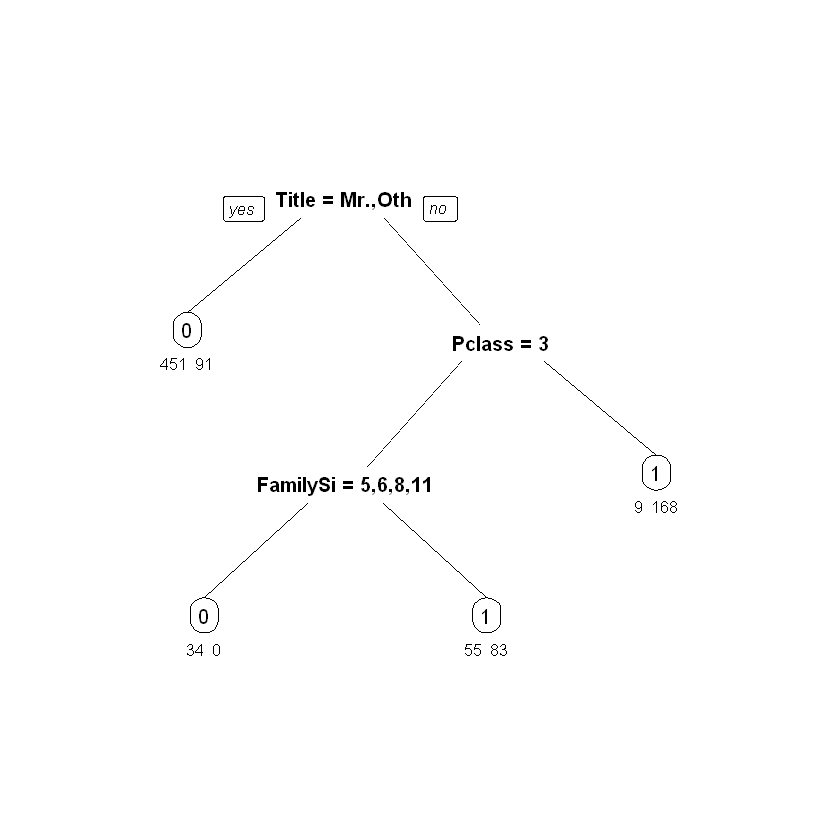

In [65]:
prp(rpart.1.cv.1$finalModel, type = 0, extra = 1, under = TRUE)

rpart.1.cv.1$finalModel

In [66]:
table(data.combined$Title)

data.combined[1:25, "Name"]


Master.   Miss.     Mr.    Mrs.   Other 
     61     260     758     199      31 

[1] Braund, Mr. Owen Harris                                
 [2] Cumings, Mrs. John Bradley (Florence Briggs Thayer)    
 [3] Heikkinen, Miss. Laina                                 
 [4] Futrelle, Mrs. Jacques Heath (Lily May Peel)           
 [5] Allen, Mr. William Henry                               
 [6] Moran, Mr. James                                       
 [7] McCarthy, Mr. Timothy J                                
 [8] Palsson, Master. Gosta Leonard                         
 [9] Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      
[10] Nasser, Mrs. Nicholas (Adele Achem)                    
[11] Sandstrom, Miss. Marguerite Rut                        
[12] Bonnell, Miss. Elizabeth                               
[13] Saundercock, Mr. William Henry                         
[14] Andersson, Mr. Anders Johan                            
[15] Vestrom, Miss. Hulda Amanda Adolfina                   
[16] Hewlett, Mrs. (Mary D Kingcome)                        
[17] Rice, Master. Eugene                                   
[18] Williams, Mr. Charles Eugene                           
[19] Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)
[20] Masselmani, Mrs. Fatima                                
[21] Fynney, Mr. Joseph J                                   
[22] Beesley, Mr. Lawrence                                  
[23] McGowan, Miss. Anna "Annie"                            
[24] Sloper, Mr. William Thompson                           
[25] Palsson, Miss. Torborg Danira                          
1307 Levels: Abbing, Mr. Anthony ... Zakarian, Mr. Ortin

In [67]:
name.splits <- str_split(data.combined$Name, ",")
name.splits[1]

[[1]]
[1] "Braund"           " Mr. Owen Harris"

In [68]:
last.names <- sapply(name.splits,"[",1)
last.names[1:10]

[1] "Braund"    "Cumings"   "Heikkinen" "Futrelle"  "Allen"     "Moran"    
 [7] "McCarthy"  "Palsson"   "Johnson"   "Nasser"

In [69]:
data.combined$last.name <- last.names

In [70]:
# Now for titles
name.splits <- str_split(sapply(name.splits,"[",2), " ")
titles <- sapply(name.splits,"[",2)

In [71]:
unique(titles)

[1] "Mr."       "Mrs."      "Miss."     "Master."   "Don."      "Rev."     
 [7] "Dr."       "Mme."      "Ms."       "Major."    "Lady."     "Sir."     
[13] "Mlle."     "Col."      "Capt."     "the"       "Jonkheer." "Dona."

In [72]:
data.combined[which(titles == "the"),]

# Re-map titles to be more exact
titles[titles %in% c("Dona.","the")] <- "Lady."
titles[titles %in% c("Ms.","Mlle.")] <- "Miss."
titles[titles %in% c("Mme.")] <- "Mrs."
titles[titles %in% c("Jonkheer.","Don.")] <- "Sir."
titles[titles %in% c("Col.","Major.","Capt.")] <- "Officer"
table(titles)

data.combined$new.title <- as.factor(titles)

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Ticket.first.char,Cabin.first.char,Cabin.multiple,last.name
760,1,760,1,"Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)",female,33,0,0,110152,86.5,B77,S,Other,1,1,B,N,Rothes


titles
    Dr.   Lady. Master.   Miss.     Mr.    Mrs. Officer    Rev.    Sir. 
      8       3      61     264     757     198       7       8       3 

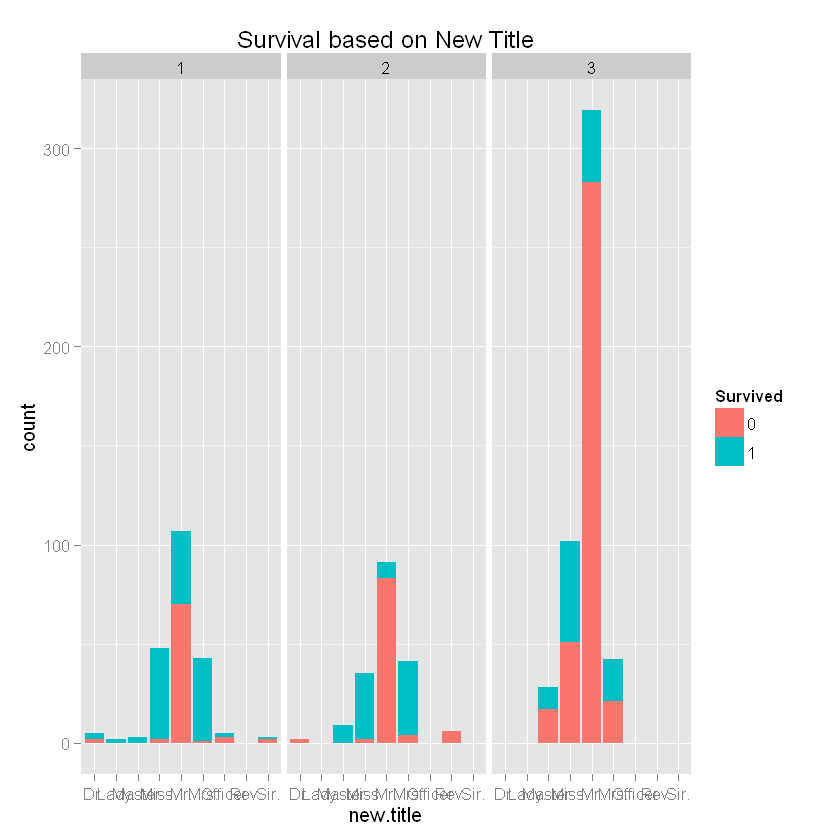

In [73]:
ggplot(data.combined[1:891,], aes(x = new.title, fill = Survived))+
  geom_bar()+
  facet_wrap(~Pclass)+
  ggtitle("Survival based on New Title")

In [74]:
# Lets cram the titles data a little more into existing data buckets so we don't overfit
indexes <- which(data.combined$new.title == "Lady.")
data.combined$new.title[indexes] <- "Mrs."

indexes <- which(data.combined$new.title == "Dr." |
                 data.combined$new.title == "Rev." |
                 data.combined$new.title == "Sir." |
                 data.combined$new.title == "Officer")
data.combined$new.title[indexes] <- "Mr."

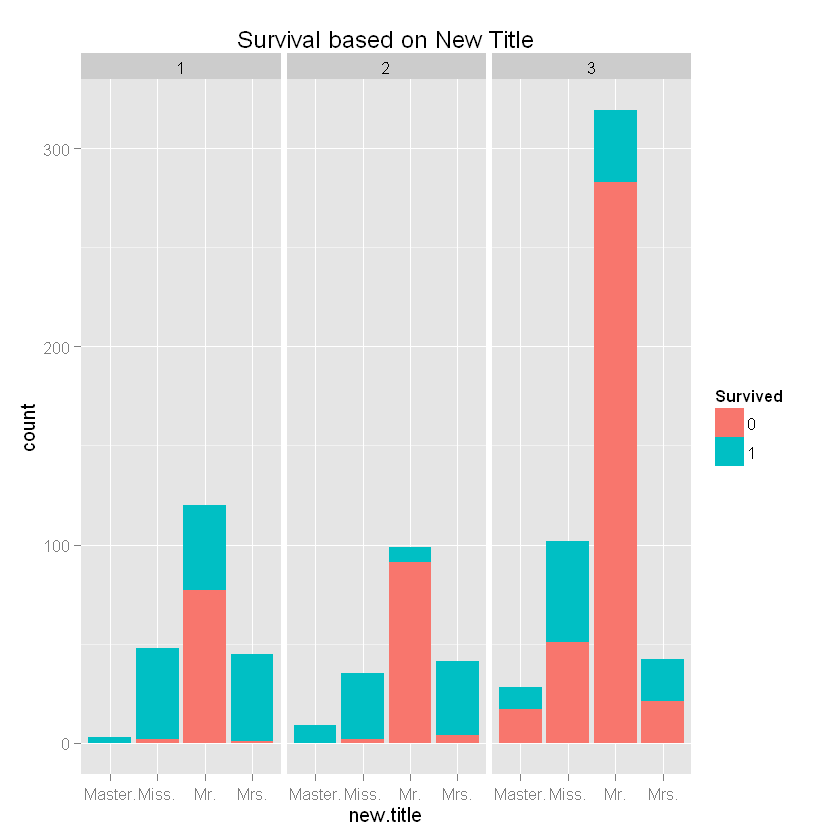

In [75]:
ggplot(data.combined[1:891,], aes(x = new.title, fill = Survived))+
  geom_bar()+
  facet_wrap(~Pclass)+
  ggtitle("Survival based on New Title")

CART 

891 samples
  3 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 10 times) 
Summary of sample sizes: 594, 594, 594, 594, 594, 594, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.00000000  0.8178451  0.6047735
  0.01582980  0.8261504  0.6252869
  0.03165961  0.8280584  0.6303902
  0.04748941  0.8145903  0.6049449
  0.06331922  0.7936027  0.5633852
  0.07914902  0.7947250  0.5672045
  0.09497883  0.7939394  0.5658414
  0.11080863  0.7929293  0.5641059
  0.12663844  0.7924804  0.5634784
  0.14246824  0.7923681  0.5635873
  0.15829804  0.7923681  0.5635873
  0.17412785  0.7923681  0.5635873
  0.18995765  0.7923681  0.5635873
  0.20578746  0.7923681  0.5635873
  0.22161726  0.7923681  0.5635873
  0.23744707  0.7923681  0.5635873
  0.25327687  0.7923681  0.5635873
  0.26910667  0.7923681  0.5635873
  0.28493648  0.7923681  0.5635873
  0.30076628  0.7923681  0.5635873
  0.31659609  0.7923681  0.

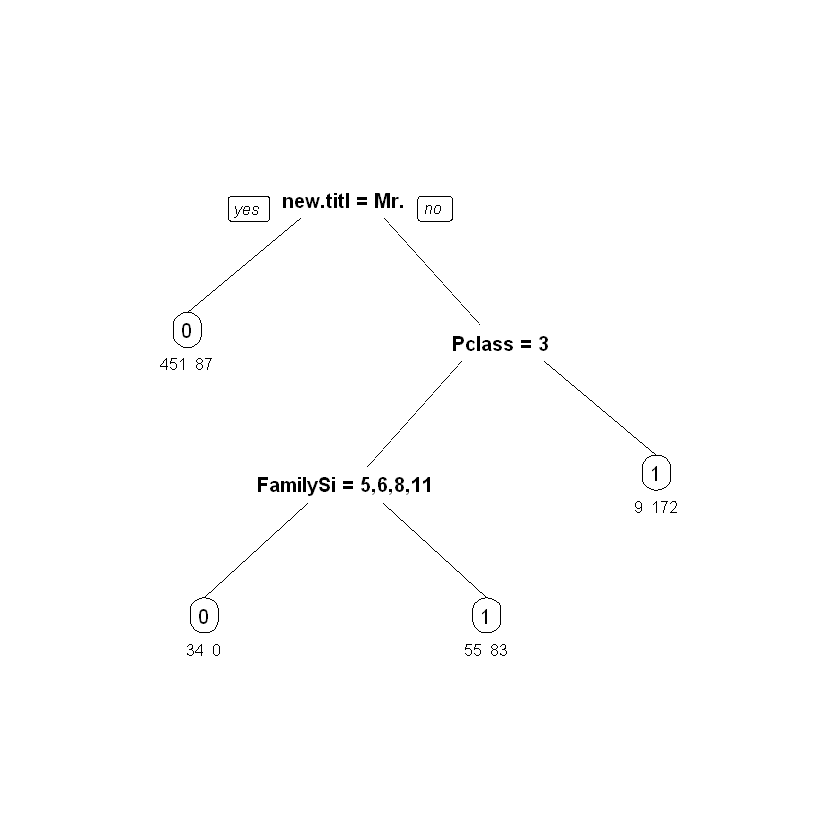

In [76]:
features <- c("Pclass","new.title","FamilySize")
rpart.train.2 <- data.combined[1:891, features]

rpart.2.cv.1 <- rpart.cv(94622, rpart.train.2, rf.label, ctrl.3)
rpart.2.cv.1

prp(rpart.2.cv.1$finalModel, type = 0, extra = 1, under = TRUE)

In [77]:
indexes.first.mr <- which(data.combined$new.title == "Mr." & data.combined$Pclass == "1")

In [78]:
first.mr.df <- data.combined[indexes.first.mr,]

In [79]:
summary(first.mr.df)

 Survived   PassengerId  Pclass                                    Name    
 0   :77   7      :  1   1:175   Anderson, Mr. Harry                 :  1  
 1   :43   24     :  1   2:  0   Andrews, Mr. Thomas Jr              :  1  
 none:55   28     :  1   3:  0   Artagaveytia, Mr. Ramon             :  1  
           31     :  1           Barkworth, Mr. Algernon Henry Wilson:  1  
           35     :  1           Baumann, Mr. John D                 :  1  
           36     :  1           Baxter, Mr. Quigg Edmond            :  1  
           (Other):169           (Other)                             :169  
     Sex           Age        SibSp       Parch        Ticket         
 female:  1   Min.   :17.00   0:122   0      :146   Length:175        
 male  :174   1st Qu.:31.00   1: 50   1      : 21   Class :character  
              Median :42.00   2:  2   2      :  6   Mode  :character  
              Mean   :42.24   3:  1   3      :  1                     
              3rd Qu.:50.50   4:  0  

In [80]:
# One female?
first.mr.df[first.mr.df$Sex == "female",]

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Ticket.first.char,Cabin.first.char,Cabin.multiple,last.name,new.title
797,1,797,1,"Leader, Dr. Alice (Farnham)",female,49,0,0,17465,25.9292,D17,S,Other,1,1,D,N,Leader,Mr.


In [81]:
# Update new.title feature
indexes <- which(data.combined$new.title == "Mr." &
                 data.combined$Sex == "female")
data.combined$new.title[indexes] <- "Mrs."

length(which(data.combined$Sex == "female" &
             (data.combined$new.title == "Master." |
               data.combined$new.title == "Mr.")))

[1] 0

In [82]:
indexes.first.mr <- which(data.combined$new.title == "Mr." & data.combined$Pclass == "1")
first.mr.df <- data.combined[indexes.first.mr,]

In [83]:
summary(first.mr.df[first.mr.df$Survived == "1",])

 Survived   PassengerId Pclass                                        Name   
 0   : 0   24     : 1   1:42   Anderson, Mr. Harry                      : 1  
 1   :42   56     : 1   2: 0   Barkworth, Mr. Algernon Henry Wilson     : 1  
 none: 0   98     : 1   3: 0   Beckwith, Mr. Richard Leonard            : 1  
           188    : 1          Behr, Mr. Karl Howell                    : 1  
           210    : 1          Bishop, Mr. Dickinson H                  : 1  
           225    : 1          Bjornstrom-Steffansson, Mr. Mauritz Hakan: 1  
           (Other):36          (Other)                                  :36  
     Sex          Age        SibSp      Parch       Ticket         
 female: 0   Min.   :17.00   0:28   0      :36   Length:42         
 male  :42   1st Qu.:28.00   1:13   1      : 4   Class :character  
             Median :36.00   2: 1   2      : 2   Mode  :character  
             Mean   :38.76   3: 0   3      : 0                     
             3rd Qu.:48.00   4: 0   

In [84]:
head(first.mr.df[first.mr.df$Survived == "1",])

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Ticket.first.char,Cabin.first.char,Cabin.multiple,last.name,new.title
24,1,24,1,"Sloper, Mr. William Thompson",male,28,0,0,113788,35.5000,A6,S,Mr.,1,1,A,N,Sloper,Mr.
56,1,56,1,"Woolner, Mr. Hugh",male,NA,0,0,19947,35.5000,C52,S,Mr.,1,1,C,N,Woolner,Mr.
98,1,98,1,"Greenfield, Mr. William Bertram",male,23,0,1,PC 17759,63.3583,D10 D12,C,Mr.,2,P,D,Y,Greenfield,Mr.
188,1,188,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45,0,0,111428,26.5500,U,S,Mr.,1,1,U,N,Romaine,Mr.
210,1,210,1,"Blank, Mr. Henry",male,40,0,0,112277,31.0000,A31,C,Mr.,1,1,A,N,Blank,Mr.
225,1,225,1,"Hoyt, Mr. Frederick Maxfield",male,38,1,0,19943,90.0000,C93,S,Mr.,2,1,C,N,Hoyt,Mr.


In [85]:
indexes <- which(data.combined$Ticket == "PC 17755" |
                 data.combined$Ticket == "PC 17611" |
                 data.combined$Ticket == "113760")

In [86]:
head(data.combined[indexes, ])

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Ticket.first.char,Cabin.first.char,Cabin.multiple,last.name,new.title
259,1,259,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,U,C,Miss.,1,P,U,N,Ward,Miss.
335,1,335,1,"Frauenthal, Mrs. Henry William (Clara Heinsheimer)",female,NA,1,0,PC 17611,133.6500,U,S,Mrs.,2,P,U,N,Frauenthal,Mrs.
391,1,391,1,"Carter, Mr. William Ernest",male,36,1,2,113760,120.0000,B96 B98,S,Mr.,4,1,B,Y,Carter,Mr.
436,1,436,1,"Carter, Miss. Lucile Polk",female,14,1,2,113760,120.0000,B96 B98,S,Miss.,4,1,B,Y,Carter,Miss.
661,1,661,1,"Frauenthal, Dr. Henry William",male,50,2,0,PC 17611,133.6500,U,S,Other,3,P,U,N,Frauenthal,Mr.
680,1,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr.,2,P,B,Y,Cardeza,Mr.


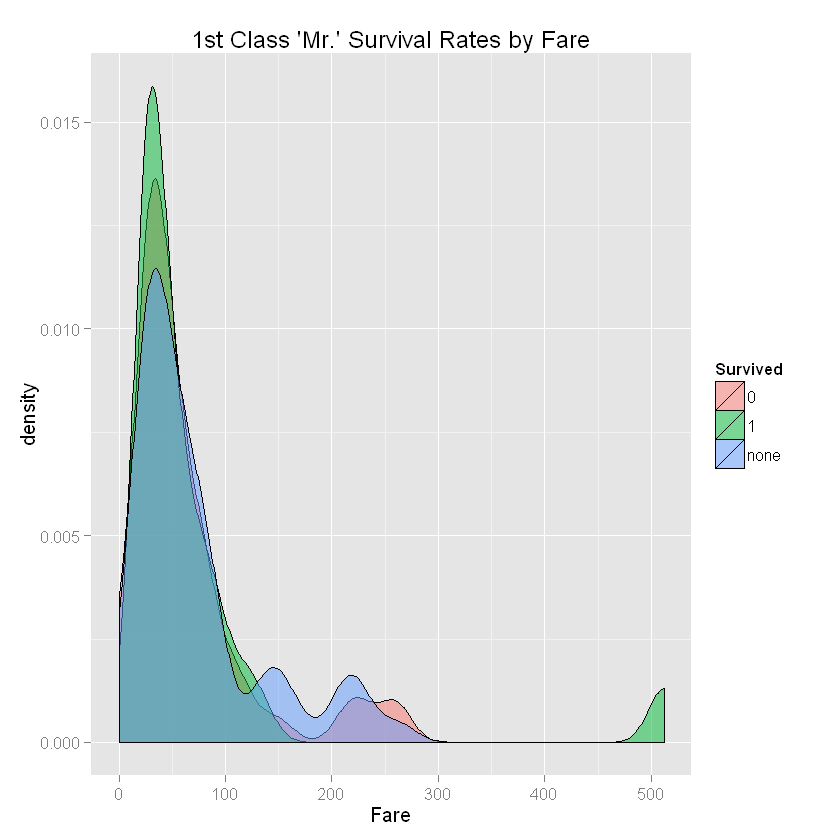

In [87]:
ggplot(first.mr.df, aes(x = Fare, fill = Survived))+
  geom_density(alpha = 0.5)+
  ggtitle("1st Class 'Mr.' Survival Rates by Fare")

In [88]:
ticket.party.size <- rep(0, nrow(data.combined))
avg.fare <- rep(0.0, nrow(data.combined))
tickets <- unique(data.combined$Ticket)
length(tickets)

[1] 929

In [89]:
for(i in 1:length(tickets)) {
  current.ticket <- tickets[i]
  party.indexes <- which(data.combined$Ticket == current.ticket)
  current.avg.fare <- data.combined[party.indexes[1],"Fare"] / length(party.indexes)
  
  for(k in 1:length(party.indexes)) {
    ticket.party.size[party.indexes[k]] <- length(party.indexes)
    avg.fare[party.indexes[k]] <- current.avg.fare
  }
}

In [90]:
data.combined$ticket.party.size <- ticket.party.size
data.combined$avg.fare <- avg.fare

In [91]:
# Refresh 1st Class Mr. data frame
first.mr.df <- data.combined[indexes.first.mr,]
summary(first.mr.df)

 Survived   PassengerId  Pclass                                    Name    
 0   :77   7      :  1   1:174   Anderson, Mr. Harry                 :  1  
 1   :42   24     :  1   2:  0   Andrews, Mr. Thomas Jr              :  1  
 none:55   28     :  1   3:  0   Artagaveytia, Mr. Ramon             :  1  
           31     :  1           Barkworth, Mr. Algernon Henry Wilson:  1  
           35     :  1           Baumann, Mr. John D                 :  1  
           36     :  1           Baxter, Mr. Quigg Edmond            :  1  
           (Other):168           (Other)                             :168  
     Sex           Age        SibSp       Parch        Ticket         
 female:  0   Min.   :17.00   0:121   0      :145   Length:174        
 male  :174   1st Qu.:31.00   1: 50   1      : 21   Class :character  
              Median :42.00   2:  2   2      :  6   Mode  :character  
              Mean   :42.20   3:  1   3      :  1                     
              3rd Qu.:50.75   4:  0  

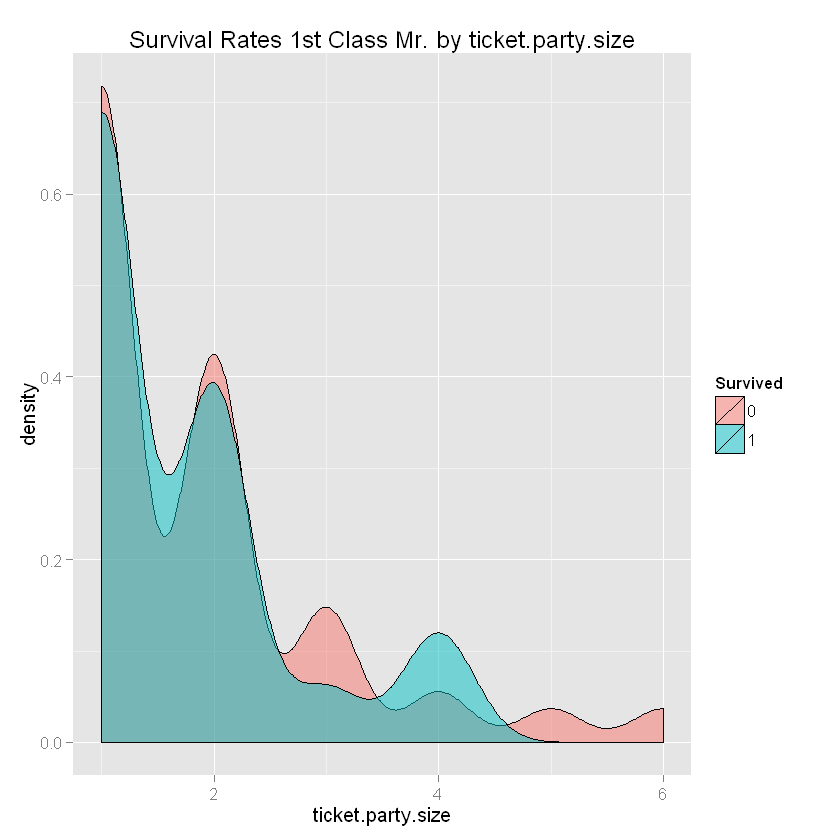

In [92]:
ggplot(first.mr.df[first.mr.df$Survived != "none",], aes(x = ticket.party.size, fill = Survived))+
  geom_density(alpha = 0.5)+
  ggtitle("Survival Rates 1st Class Mr. by ticket.party.size")

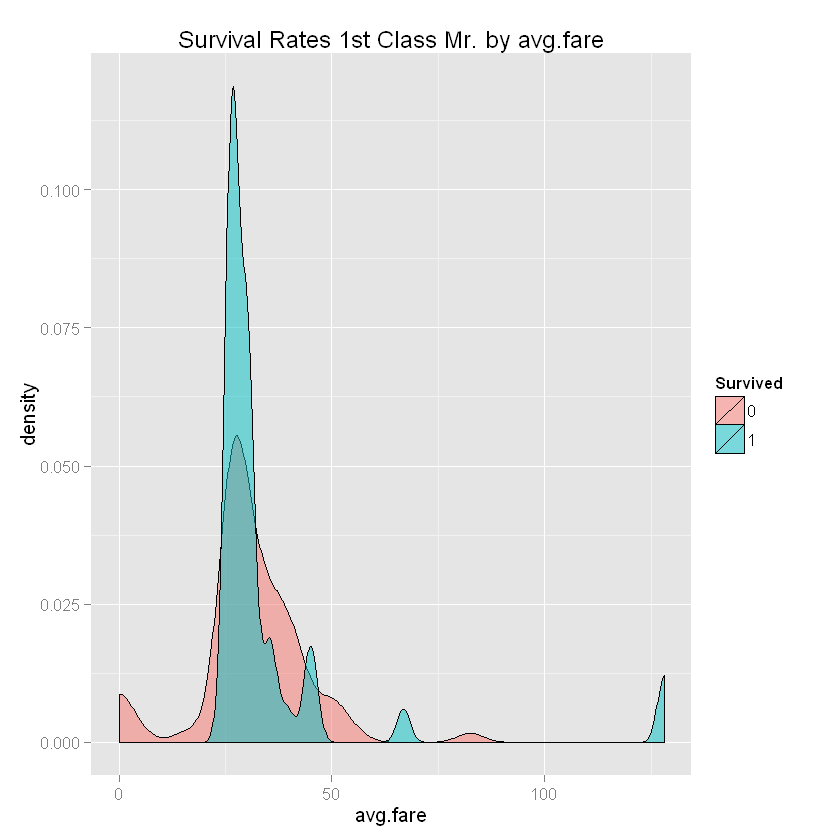

In [93]:
ggplot(first.mr.df[first.mr.df$Survived != "none",], aes(x = avg.fare, fill = Survived))+
  geom_density(alpha = 0.5)+
  ggtitle("Survival Rates 1st Class Mr. by avg.fare")

In [94]:
# Hypothesis - ticket.party.size and avg.fare seem to be highly correlated
summary(data.combined$avg.fare)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    7.55    8.05   14.76   15.01  128.10       1 

In [95]:
# One missing value!?
data.combined[is.na(data.combined$avg.fare),]

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Title,FamilySize,Ticket.first.char,Cabin.first.char,Cabin.multiple,last.name,new.title,ticket.party.size,avg.fare
1044,none,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NA,...,S,Mr.,1,3,U,N,Storey,Mr.,1,NA


In [96]:
# Get records for similar passengers and summarize avg.fares
indexes <- with(data.combined,which(Pclass == "3" & Title == "Mr." & FamilySize == 1 & Ticket != "3701"))
similar.na.passengers <- data.combined[indexes,]
summary(similar.na.passengers$avg.fare)

# Use median since it is close to mean  and a little higher than mean
data.combined[is.na(avg.fare),"avg.fare"] <- 7.84

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   7.250   7.840   7.717   8.050  10.170 

In [97]:
# Now leverage Caret's preProcess function to normalize data
preproc.data.combined <- data.combined[,c("ticket.party.size","avg.fare")]
preProc <- preProcess(preproc.data.combined, method = c("center", "scale"))

postproc.data.combined <- predict(preProc, preproc.data.combined)

In [98]:
# Hypothesis refuted for all data
cor(postproc.data.combined$ticket.party.size, postproc.data.combined$avg.fare)

[1] 0.09428625

In [99]:
# How about just for 1st class all up?
indexes <- which(data.combined$Pclass == "1")
cor(postproc.data.combined$ticket.party.size[indexes], postproc.data.combined$avg.fare[indexes])

[1] 0.2576249

In [100]:
# Hypothesis refuted again!

In [101]:
# OK, let's see if our feature engineering has made any difference
features <- c("Pclass","new.title","FamilySize","ticket.party.size","avg.fare")
rpart.train.3 <- data.combined[1:891, features]

CART 

891 samples
  5 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 10 times) 
Summary of sample sizes: 594, 594, 594, 594, 594, 594, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.00000000  0.8214366  0.6170703
  0.01593063  0.8315376  0.6352241
  0.03186126  0.8305275  0.6336075
  0.04779189  0.8157127  0.6070448
  0.06372252  0.7965208  0.5710962
  0.07965316  0.7958474  0.5698216
  0.09558379  0.7950617  0.5684585
  0.11151442  0.7940516  0.5667230
  0.12744505  0.7936027  0.5660955
  0.14337568  0.7934905  0.5662044
  0.15930631  0.7934905  0.5662044
  0.17523694  0.7934905  0.5662044
  0.19116757  0.7934905  0.5662044
  0.20709821  0.7934905  0.5662044
  0.22302884  0.7934905  0.5662044
  0.23895947  0.7934905  0.5662044
  0.25489010  0.7934905  0.5662044
  0.27082073  0.7934905  0.5662044
  0.28675136  0.7934905  0.5662044
  0.30268199  0.7934905  0.5662044
  0.31861262  0.7934905  0.

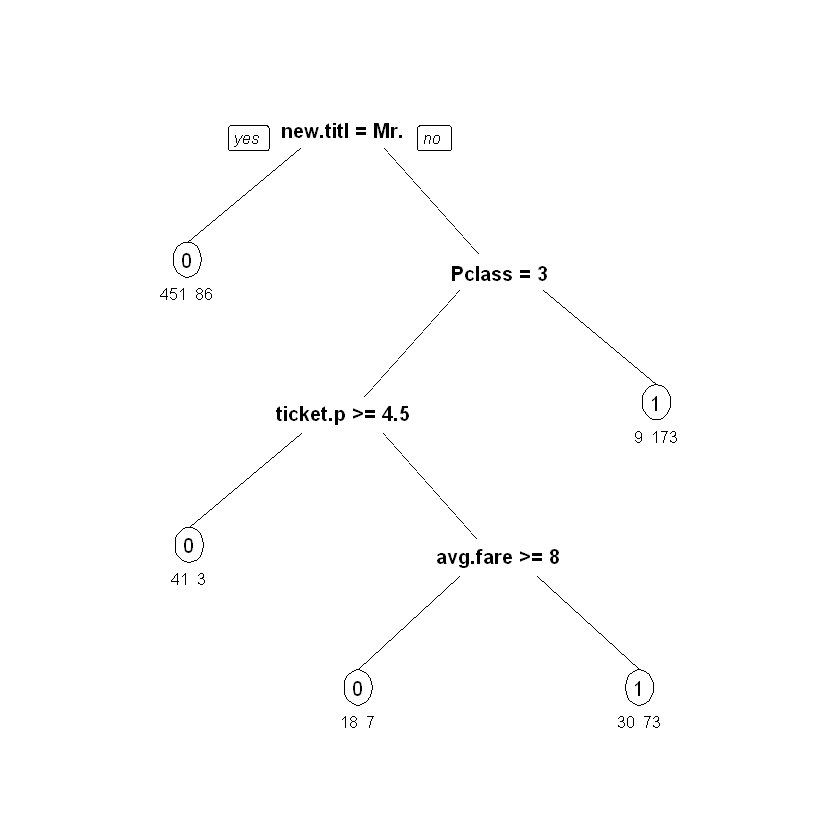

In [102]:
# Run CV
rpart.3.cv.1 <- rpart.cv(94622, rpart.train.3, rf.label, ctrl.3)
rpart.3.cv.1

prp(rpart.3.cv.1$finalModel, type = 0, extra = 1, under = TRUE)

In [103]:
####################################################################################################
#                                                                                                  #
#                                       FINAL THOUGHTS                                             #
#                                                                                                  #
####################################################################################################

test.submit.df <- data.combined[892:1309, features]

rpart.3.preds <- predict(rpart.3.cv.1$finalModel, test.submit.df, type = "class")
table(rpart.3.preds)

rpart.3.preds
  0   1 
266 152 

In [104]:
# Let's try another approach now

require(randomForest)

features <- c("Pclass","new.title","ticket.party.size","avg.fare")
rf.train.temp <- data.combined[1:891, features]

set.seed(1234)
rf.temp <- randomForest(x = rf.train.temp, y = rf.label, ntree = 1000)
rf.temp

test.submit.df <- data.combined[892:1309, features]

rf.preds <- predict(rf.temp,test.submit.df)
table(rf.preds)


Call:
 randomForest(x = rf.train.temp, y = rf.label, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 16.16%
Confusion matrix:
    0   1 class.error
0 502  47   0.0856102
1  97 245   0.2836257

rf.preds
  0   1 
265 153 

In [105]:
###################
#
# Alright...let's see how we can get things even better
#

library(infotheo)

mutinformation(rf.label,data.combined$Pclass[1:891])
mutinformation(rf.label,data.combined$Sex[1:891])
mutinformation(rf.label,discretize(data.combined$Age[1:891]))
mutinformation(rf.label,data.combined$SibSp[1:891])
mutinformation(rf.label,data.combined$Parch[1:891])
mutinformation(rf.label,discretize(data.combined$Fare[1:891]))
mutinformation(rf.label,data.combined$Embarked[1:891])
mutinformation(rf.label,data.combined$Title[1:891])
mutinformation(rf.label,data.combined$FamilySize[1:891])
mutinformation(rf.label,data.combined$Ticket.first.char[1:891])
mutinformation(rf.label,data.combined$Cabin.multiple[1:891])
mutinformation(rf.label,data.combined$new.title[1:891])
mutinformation(rf.label,data.combined$ticket.party.size[1:891])
mutinformation(rf.label,discretize(data.combined$avg.fare[1:891]))

[1] 0.05810725

[1] 0.1508705

[1] 0.0007502359

[1] 0.02319709

[1] 0.01636558

[1] 0.06616096

[1] 0.01666817

[1] 0.1661094

[1] 0.04778124

[1] 0.0686185

[1] 0.002248365

[1] 0.1710514

[1] 0.05860494

[1] 0.05206484

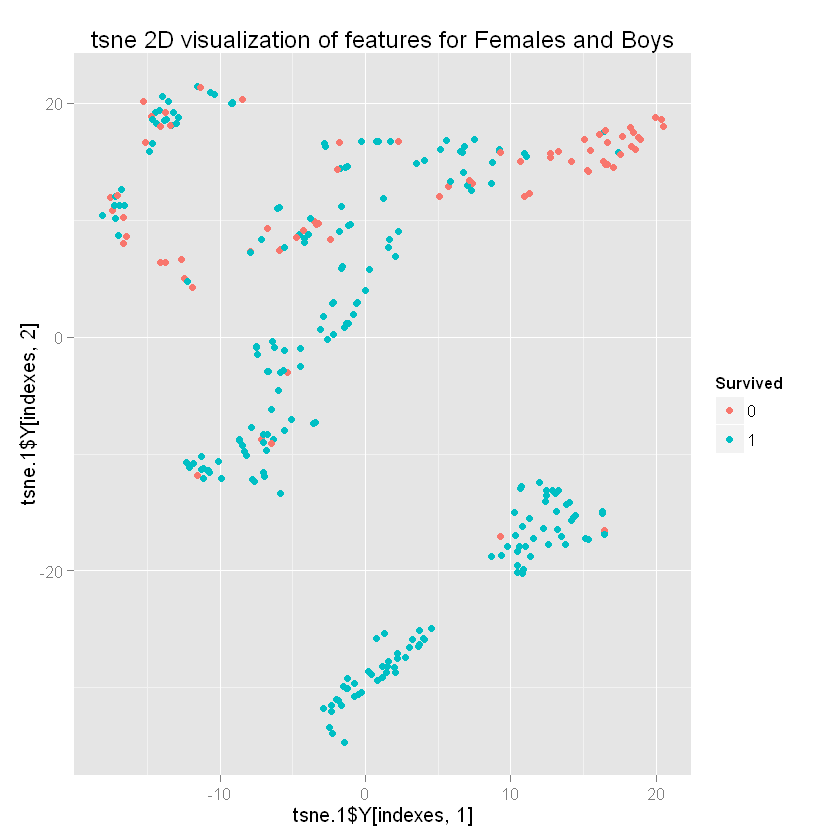

In [106]:
#-----------------
#
# Now we'll leverage the 'tsne' algorithm to create 2-D representation of our data suitable
# for visualization starting with folks our model gets right very often - females and boys.

library(Rtsne)

most.correct <- data.combined[data.combined$new.title != "Mr.",]
indexes <- which(most.correct$Survived != "none")

tsne.1 <- Rtsne(most.correct[, features], check_duplicates = FALSE)
ggplot(NULL, aes(x = tsne.1$Y[indexes,1], y = tsne.1$Y[indexes,2],
                 color = most.correct$Survived[indexes])) +
  geom_point() +
  labs(color = "Survived") +
  ggtitle("tsne 2D visualization of features for Females and Boys")

In [107]:
# To get a baseline, let's use conditional mutual information on the tsne x and
# y features for females and boys in 1st and 2nd class. The intuition here is that
# the combination of these features should be higher than any individual featueres
# we looked at above.

condinformation(most.correct$Survived[indexes], discretize(tsne.1$Y[indexes,]))

[1] 0.2577687

In [108]:
# As one more comparison, we can leverage conditional mutual information using
# the top two features used in our tree plot - new.title and Pclass

condinformation(rf.label,data.combined[1:891,c("new.title","Pclass")])

[1] 0.2506932

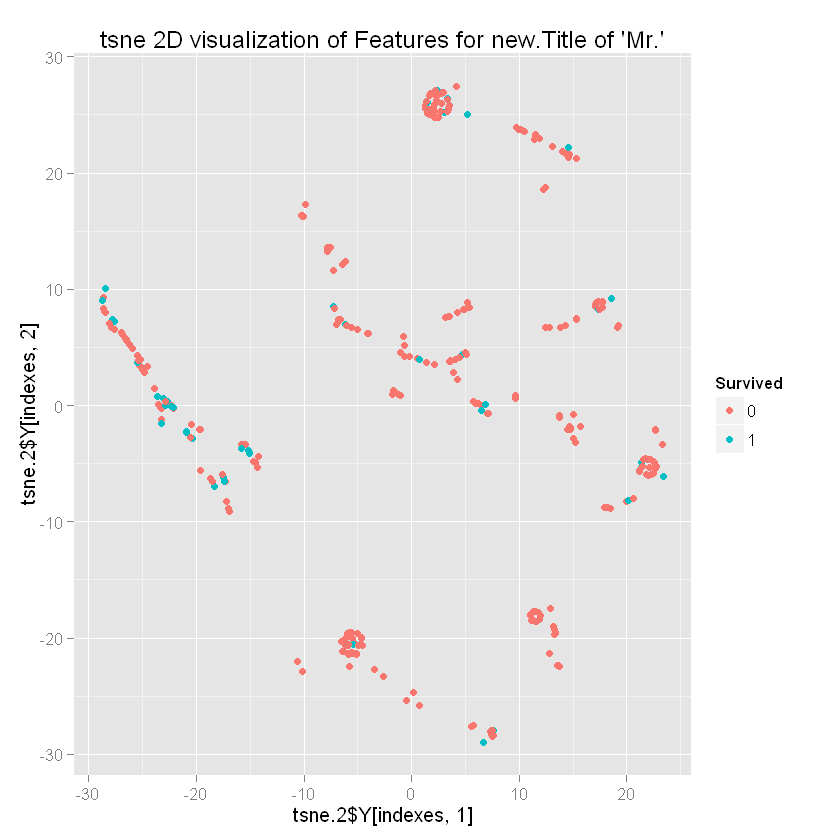

In [109]:
# OK. Now let's take a look at adult males since our model has the biggest
# potential upside for improving (i.e., the tree predicts incorrectly for 86
# adult males). Let's visualize with tsne.
misters <- data.combined[data.combined$new.title == "Mr.",]
indexes <- which(misters$Survived != "none")

tsne.2 <- Rtsne(misters[, features], check_duplicates = FALSE)
ggplot(NULL, aes(x = tsne.2$Y[indexes,1], y = tsne.2$Y[indexes,2],
                 color = misters$Survived[indexes])) +
  geom_point() +
  labs(color = "Survived") +
  ggtitle("tsne 2D visualization of Features for new.Title of 'Mr.'")

In [110]:
# Now, conditional mutual information for tsne features for adult males
condinformation(misters$Survived[indexes], discretize(tsne.2$Y[indexes,]))

[1] 0.08841912

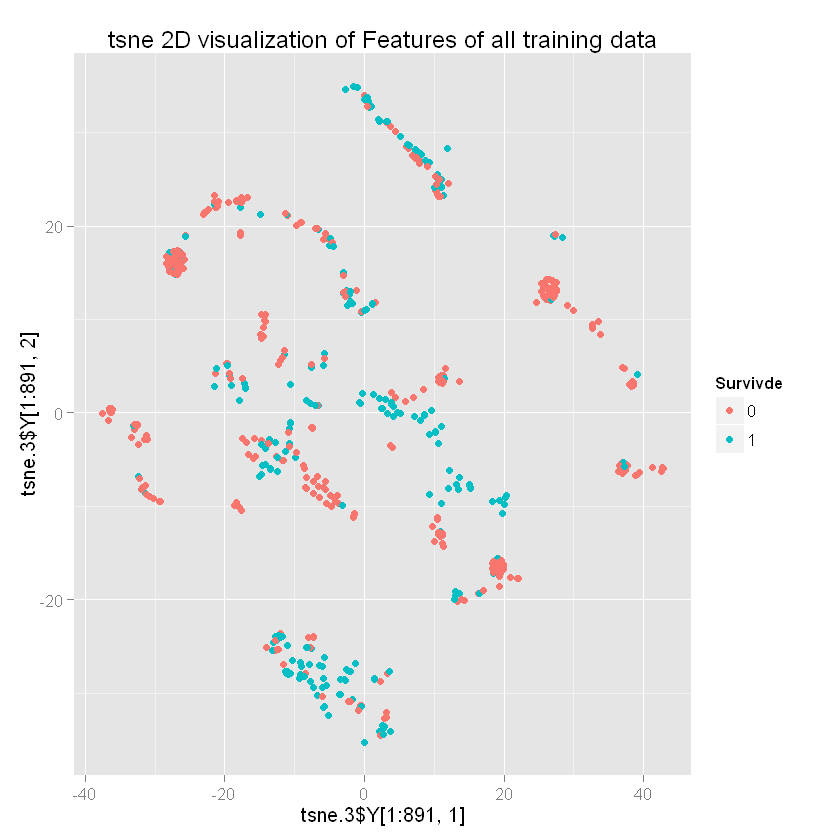

In [111]:
#
# Idea - How about creating tsne features for all of the training data and
# using them in our model?
#

tsne.3 <- Rtsne(data.combined[, features], check_duplicates = FALSE)
ggplot(NULL, aes(x = tsne.3$Y[1:891, 1], y = tsne.3$Y[1:891, 2],
                 color = data.combined$Survived[1:891])) +
  geom_point() +
  labs(color = "Survived") +
  ggtitle("tsne 2D visualization of Features of all training data")

In [112]:
# Conditional Mutual information
condinformation(data.combined$Survived[1:891], discretize(tsne.3$Y[1:891,]))

# Add the tsne features to our data frame for use in model building
data.combined$tsne.x <- tsne.3$Y[,1]
data.combined$tsne.y <- tsne.3$Y[,2]

[1] 0.2148265

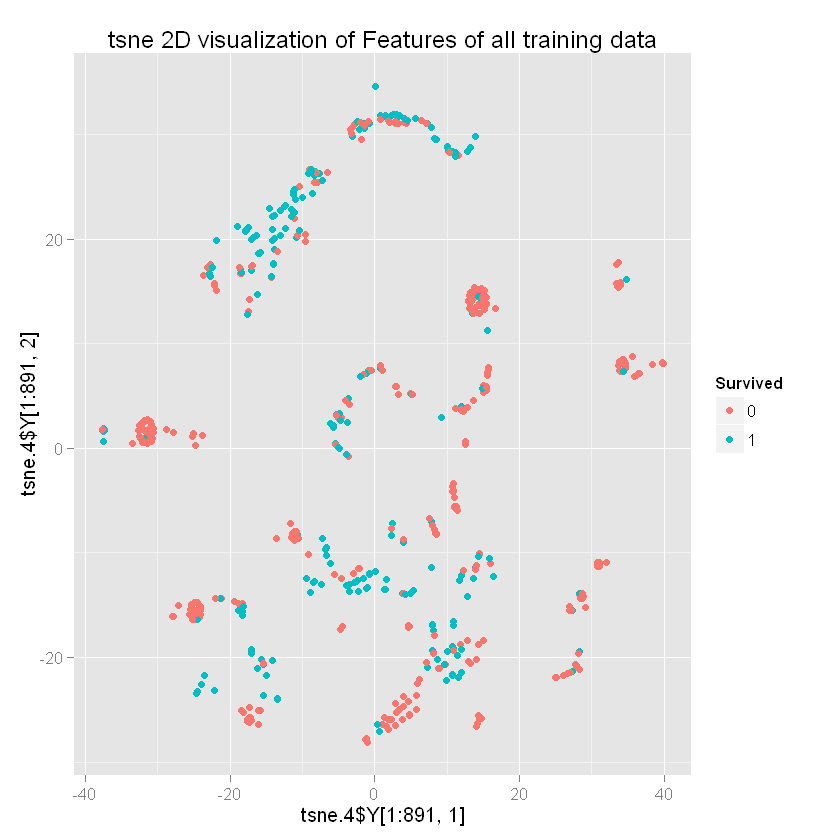

In [114]:
tsne.4 <- Rtsne(data.combined[, features], check_duplicates = FALSE)
ggplot(NULL, aes(x = tsne.4$Y[1:891, 1], y = tsne.4$Y[1:891, 2],
                 color = data.combined$Survived[1:891])) +
  geom_point() +
  labs(color = "Survived") +
  ggtitle("tsne 2D visualization of Features of all training data")